<a href="https://colab.research.google.com/github/ShraddhaSharma24/Synthetic-Lane-Detection-Project/blob/main/Synthetic_Lane_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthetic Lane Detection Project

Overview

This project generates a synthetic lane detection video and applies basic lane detection using edge detection techniques. The synthetic video simulates a road with lane markings, and the detection algorithm processes the video to extract lane boundaries.

Objectives

Generate a synthetic road video with lane markings.

Detect lane boundaries using edge detection techniques.

Display processed frames with detected lanes.


Implementation Details


1. Synthetic Lane Video Generation

A grayscale road is created with two white lane markings.

The lane markings have slight movement to simulate real-world conditions.

The video is generated using OpenCV and saved as lane_video.mp4.


2. Lane Detection Algorithm

The video is loaded frame-by-frame.

Each frame is converted to grayscale.

Gaussian blur is applied to smooth the image.

Canny edge detection is used to extract lane boundaries.

The processed frames are displayed using cv2_imshow() in Google Colab.



Applications

Understanding computer vision techniques for lane detection.

Developing autonomous vehicle perception systems.

Extending the project to real-world datasets for advanced lane detection.

Future Improvements

Use deep learning models for more robust lane detection.

Implement Hough Transform to detect lane lines.

Apply perspective transformation to improve detection accuracy.



In [1]:
import cv2
import numpy as np

In [2]:
def canny_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    return edges

In [3]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(100, height), (1200, height), (600, 350)]  # Triangular mask
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image


In [4]:
def detect_lines(image):
    edges = canny_edge_detection(image)
    cropped_edges = region_of_interest(edges)
    lines = cv2.HoughLinesP(cropped_edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=50)
    return lines

In [5]:
def draw_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return cv2.addWeighted(image, 0.8, line_image, 1, 1)

In [6]:
def main():
    cap = cv2.VideoCapture("lane_video.mp4")  # Use any sample video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        lines = detect_lines(frame)
        lane_image = draw_lines(frame, lines)
        cv2.imshow("Lane Detection", lane_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


In [7]:
if __name__ == "__main__":
    main()

In [9]:
import cv2
import numpy as np

# Video settings
width, height = 640, 480
fps = 30
seconds = 5  # Duration of the video

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('lane_video.mp4', fourcc, fps, (width, height))

# Function to draw lanes
def draw_lanes(frame, offset):
    # Draw road background
    frame[:] = (50, 50, 50)  # Dark gray road

    # Lane line properties
    lane_color = (255, 255, 255)  # White lanes
    thickness = 5

    # Draw two lane markings
    cv2.line(frame, (width//3 + offset, height), (width//3 + offset, 0), lane_color, thickness)
    cv2.line(frame, (2*width//3 - offset, height), (2*width//3 - offset, 0), lane_color, thickness)

    return frame

# Generate frames
for i in range(fps * seconds):
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    offset = int(10 * np.sin(i * 0.1))  # Simulating slight lane movement
    frame = draw_lanes(frame, offset)
    out.write(frame)

# Release the video writer
out.release()
cv2.destroyAllWindows()

print("Synthetic lane detection video saved as lane_video.mp4")

Synthetic lane detection video saved as lane_video.mp4


Synthetic lane detection video saved as lane_video.mp4


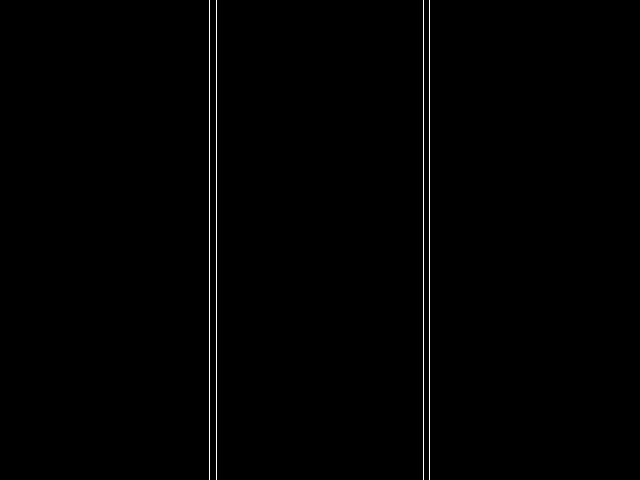

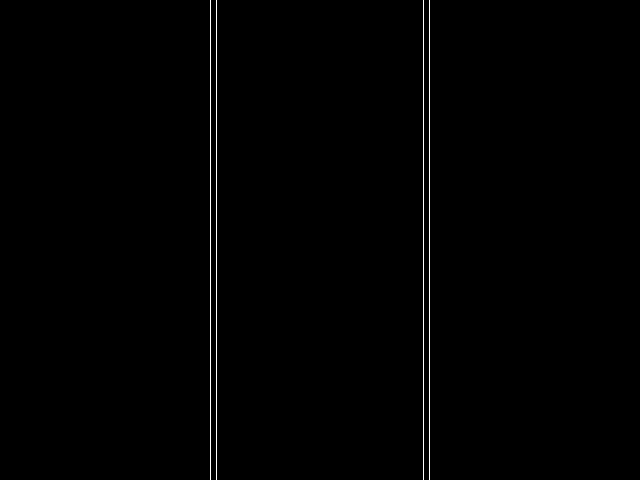

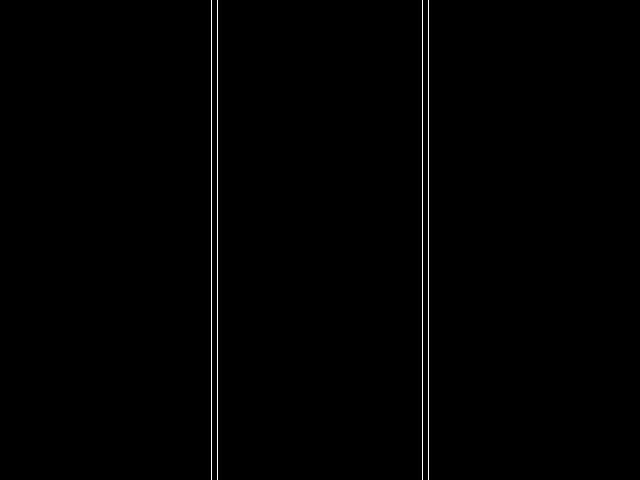

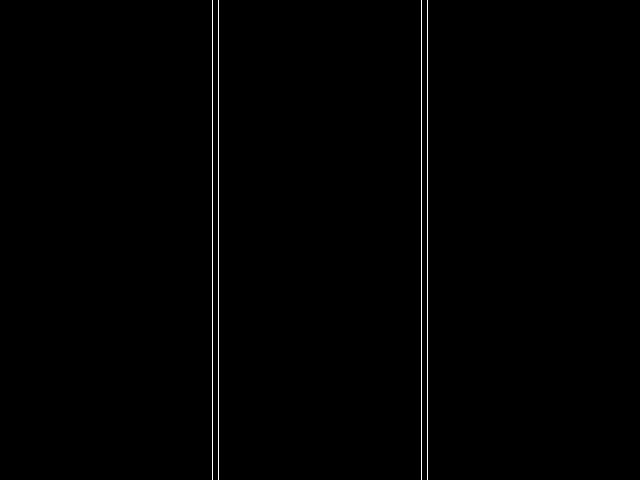

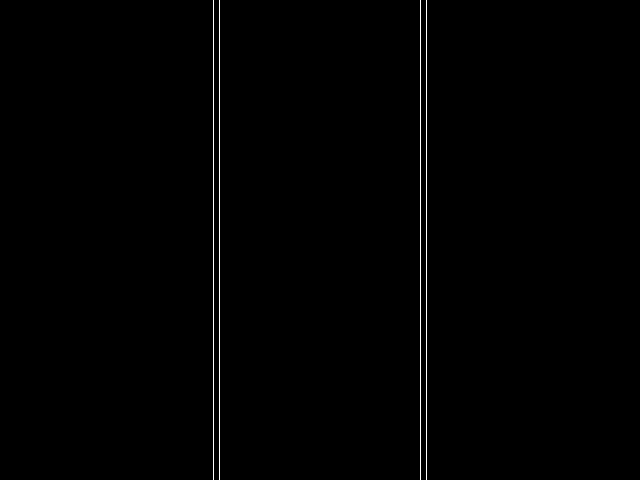

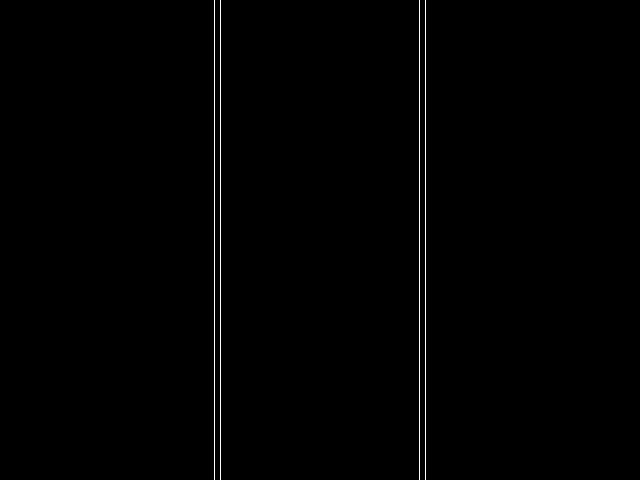

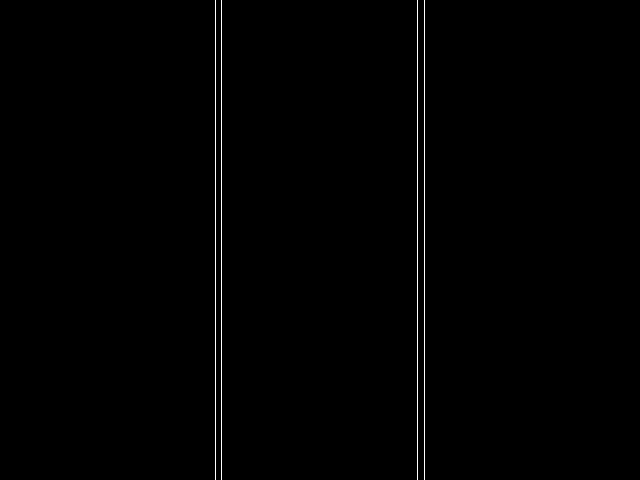

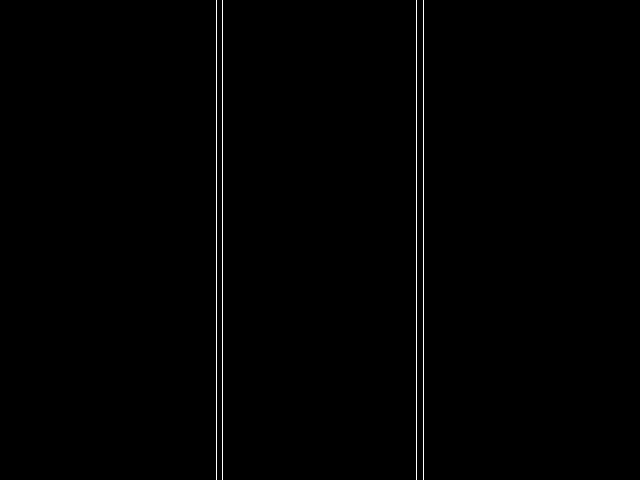

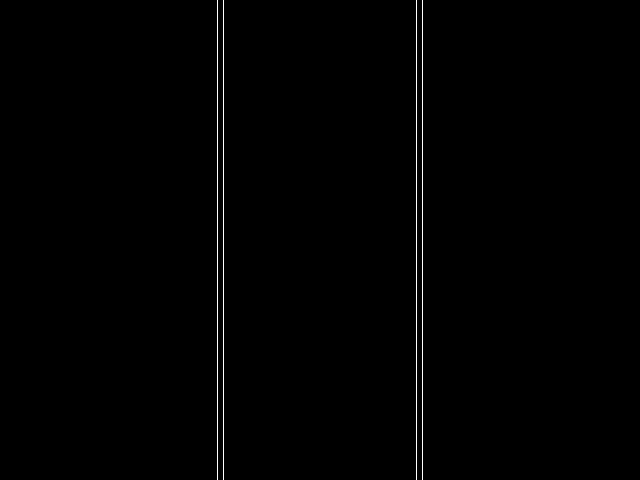

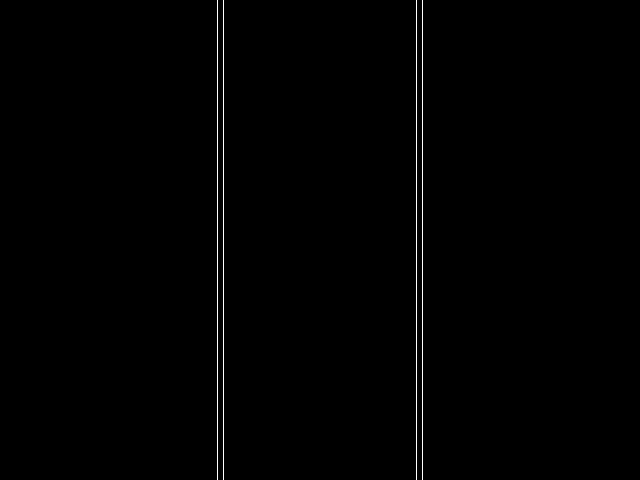

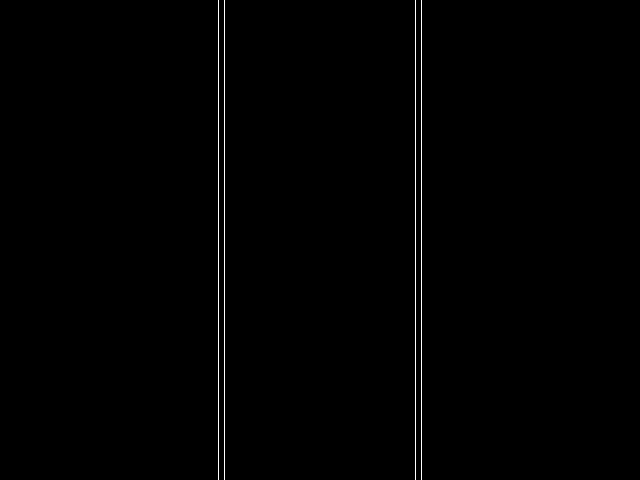

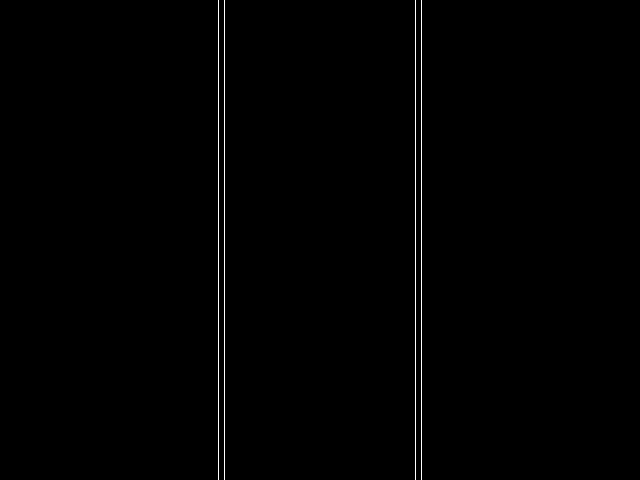

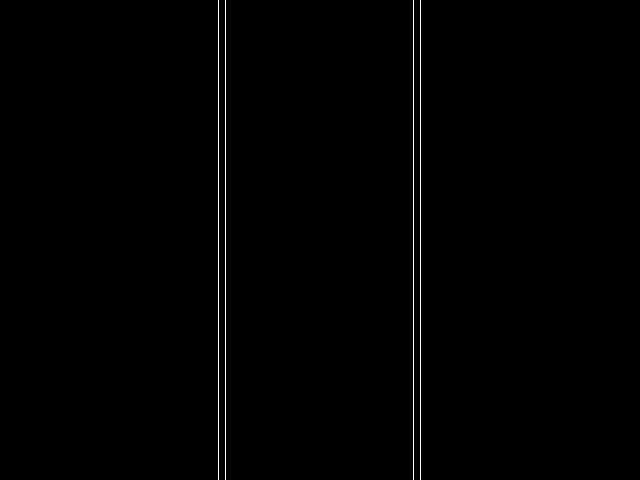

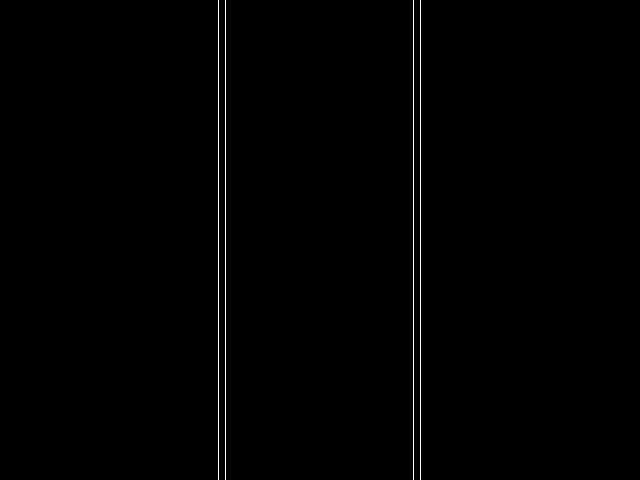

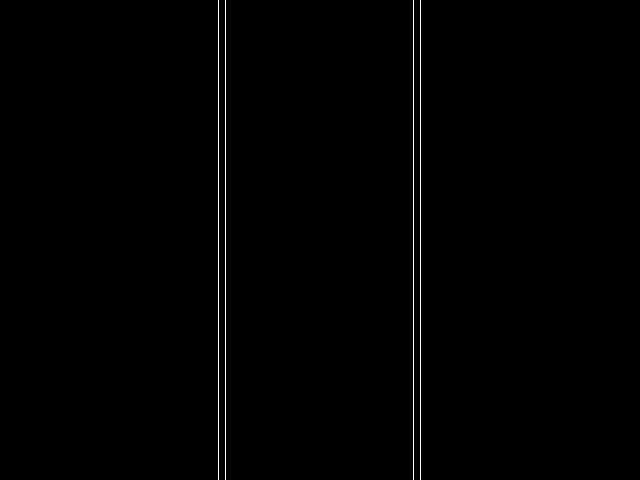

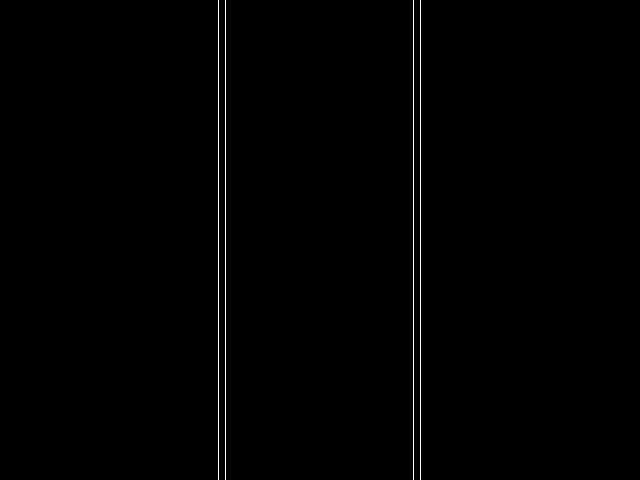

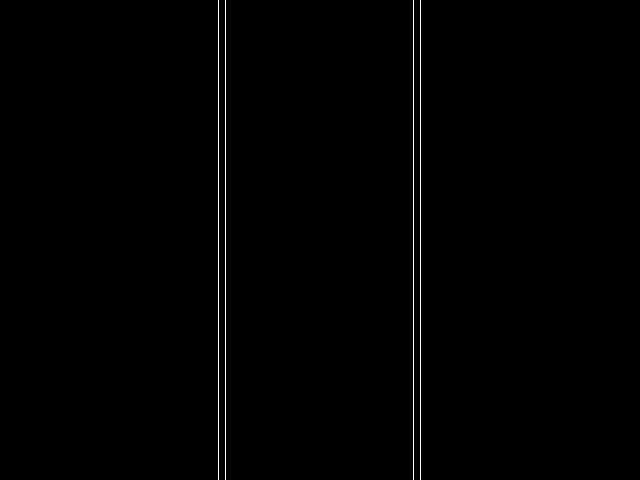

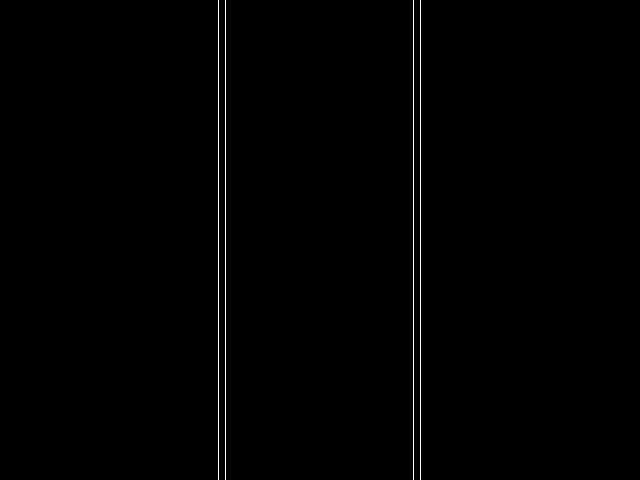

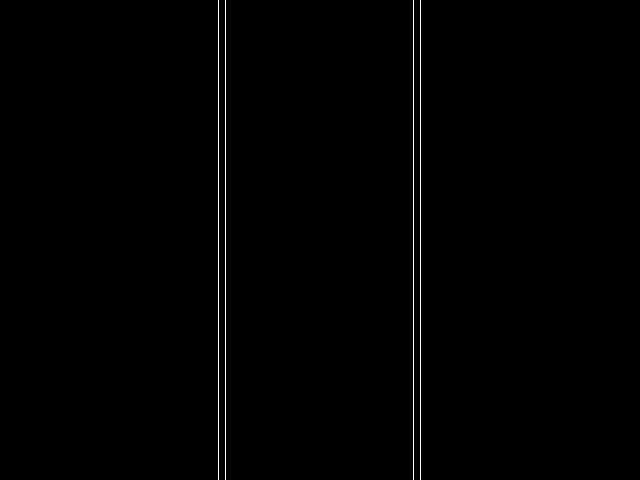

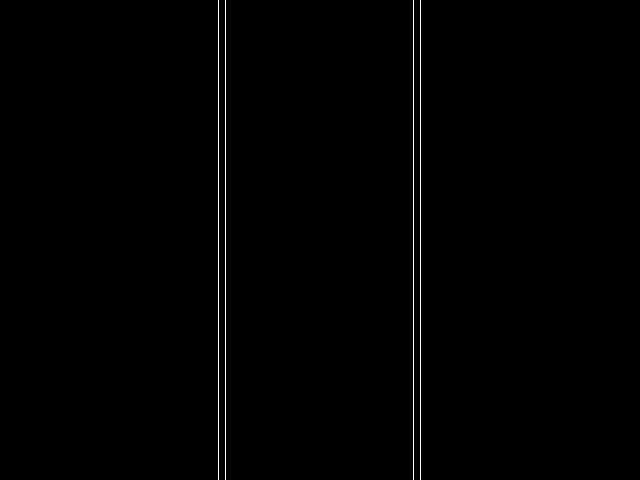

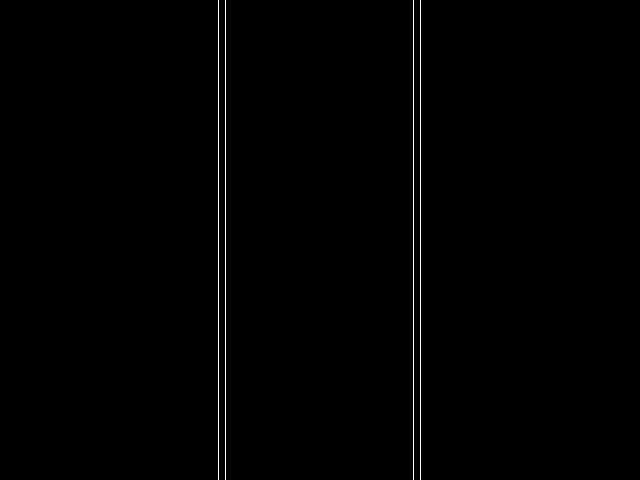

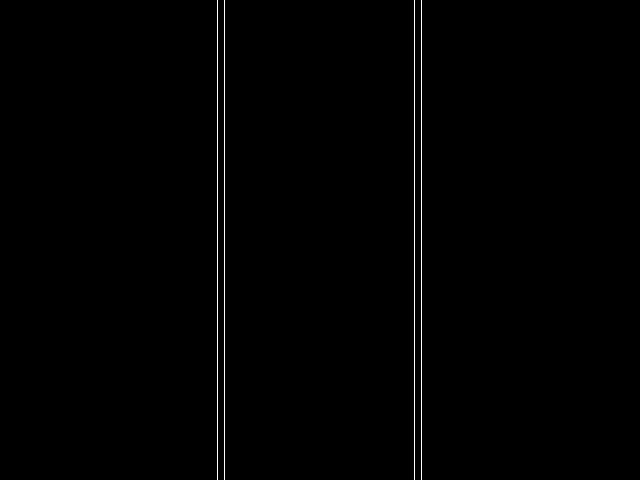

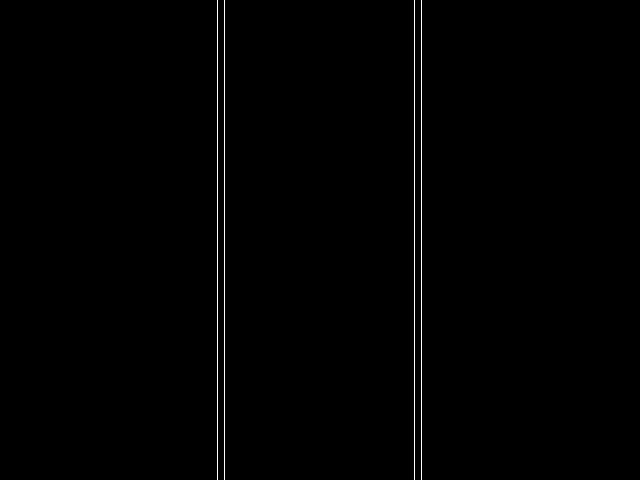

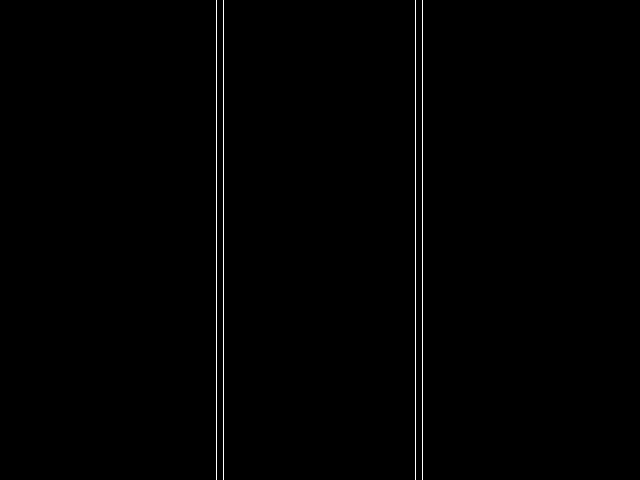

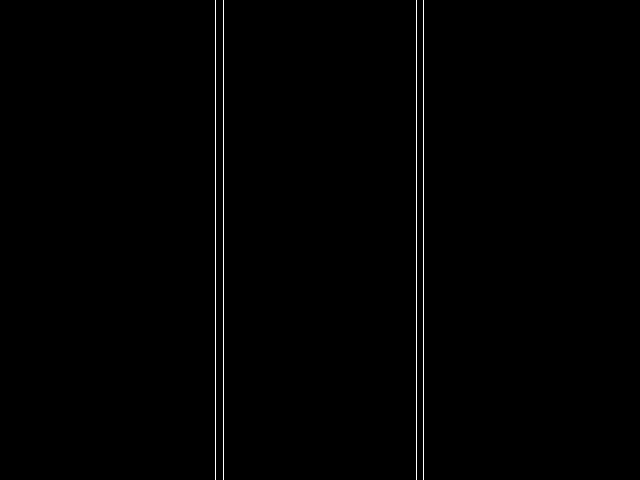

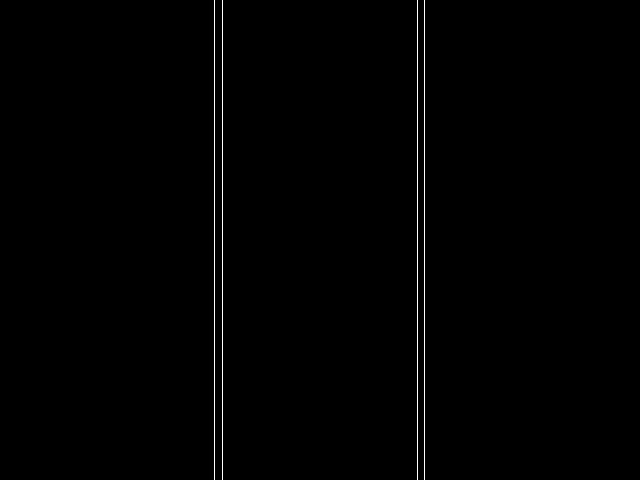

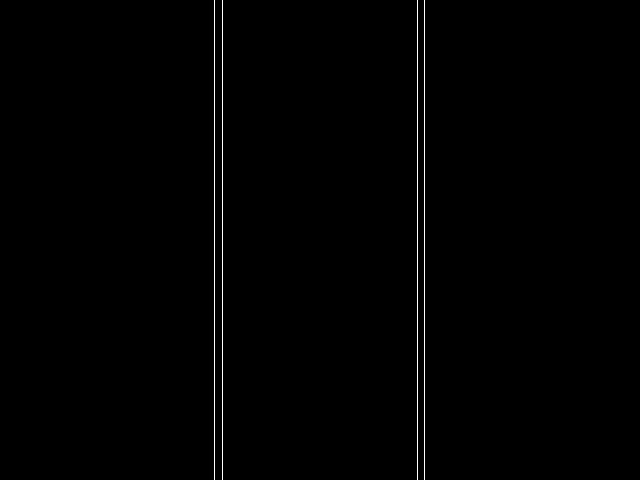

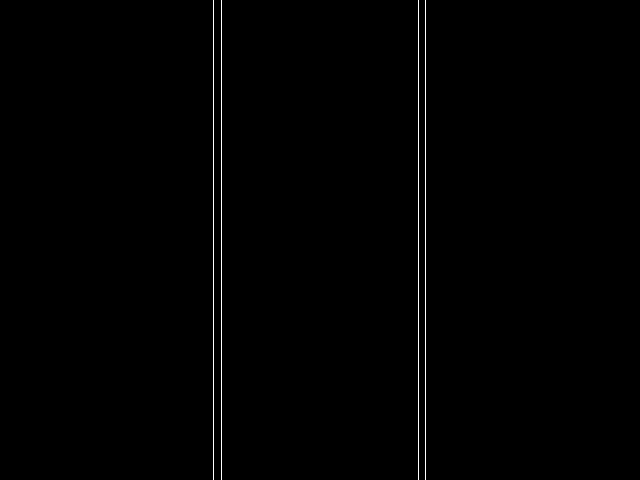

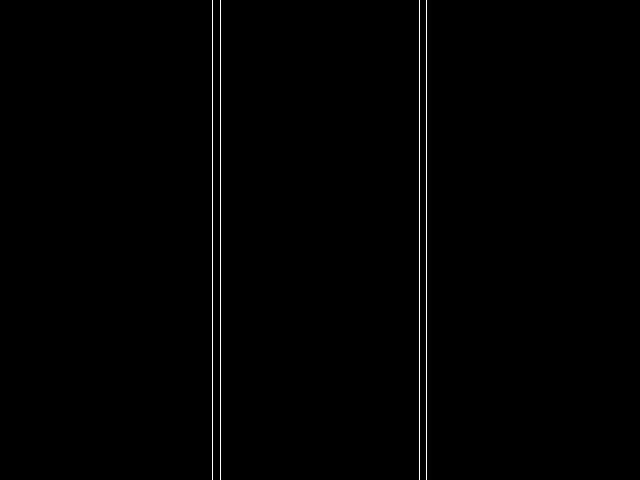

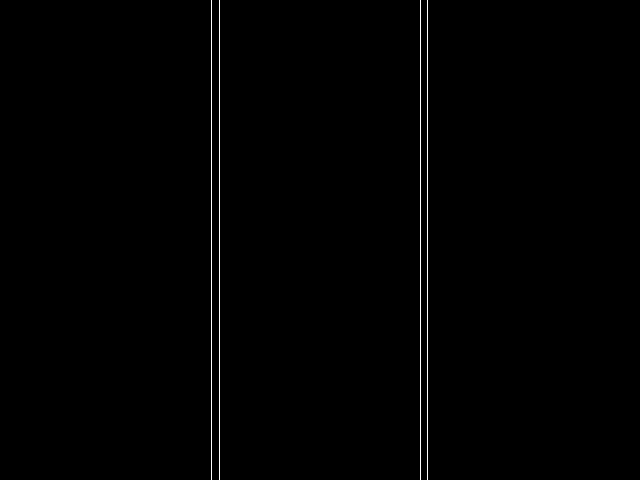

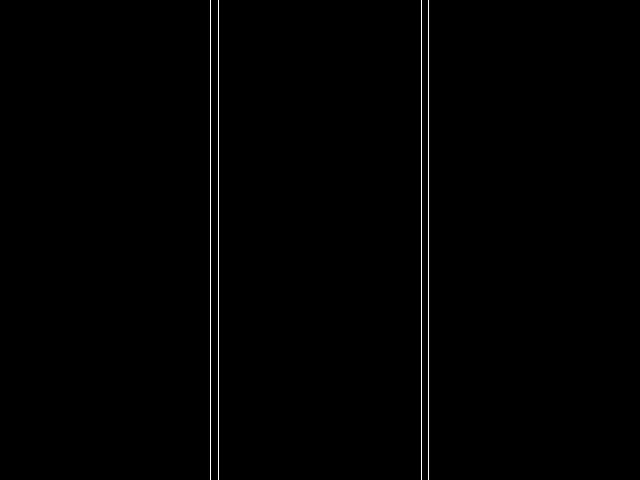

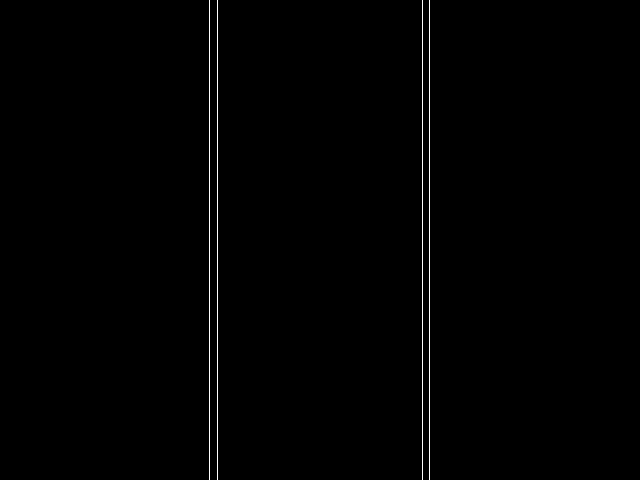

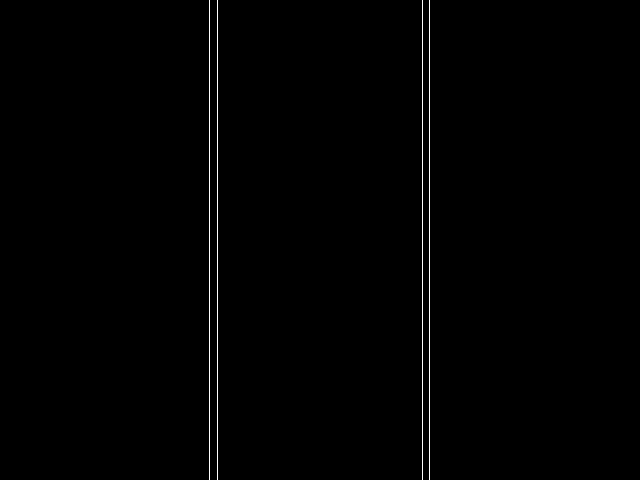

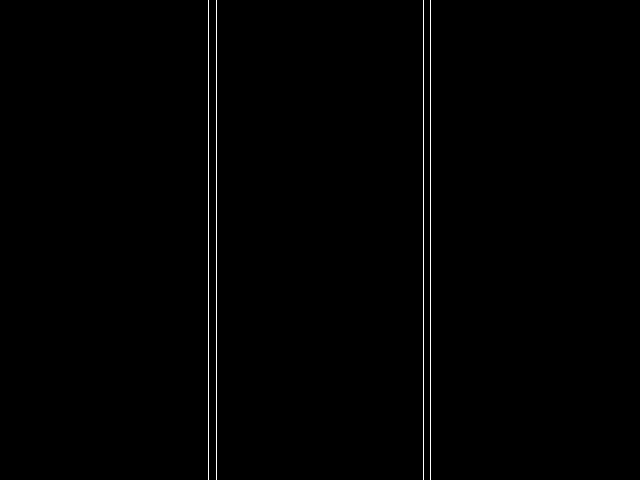

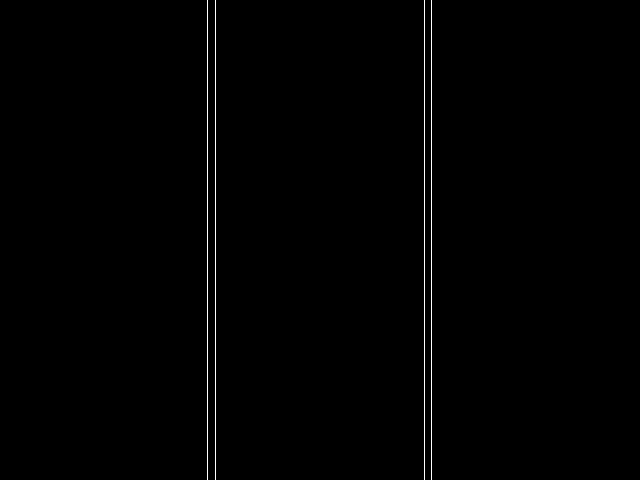

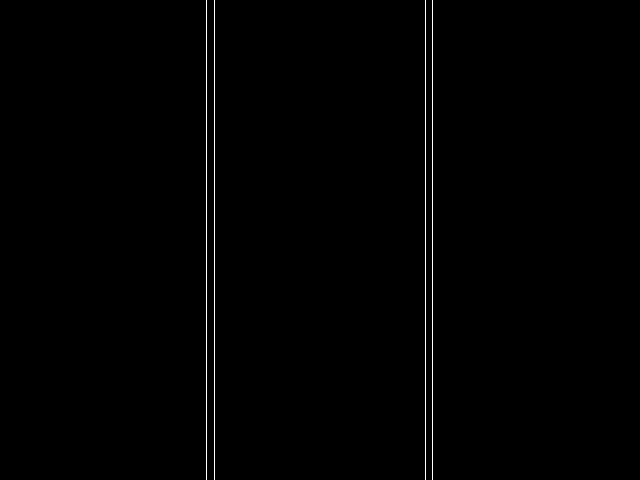

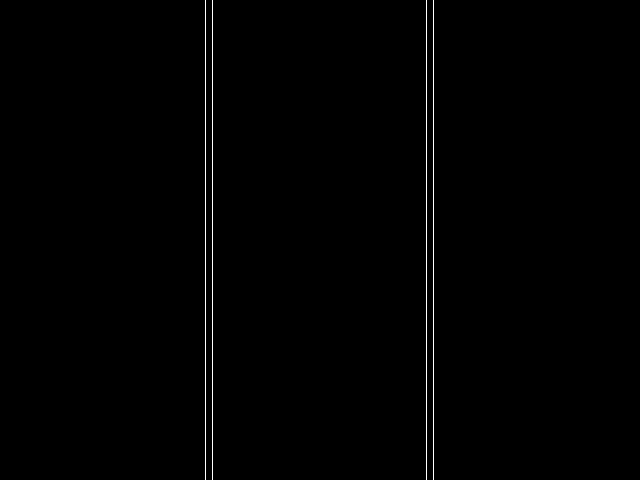

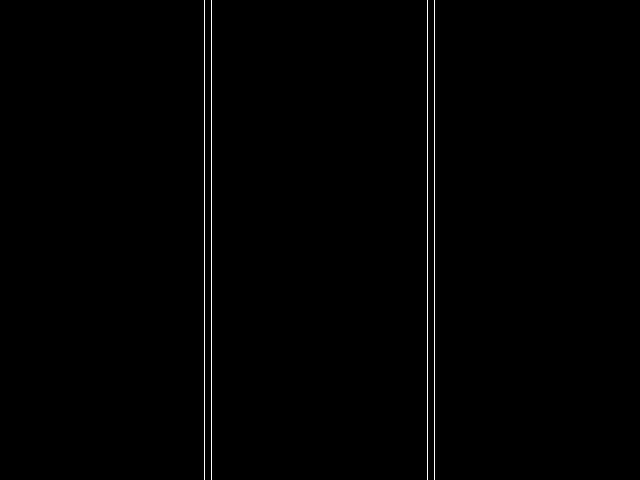

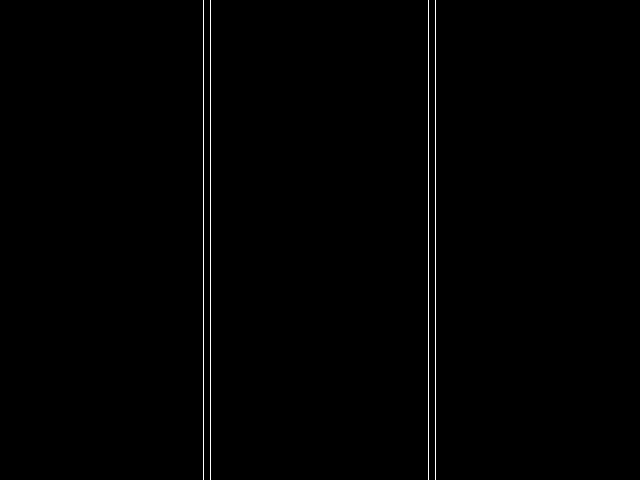

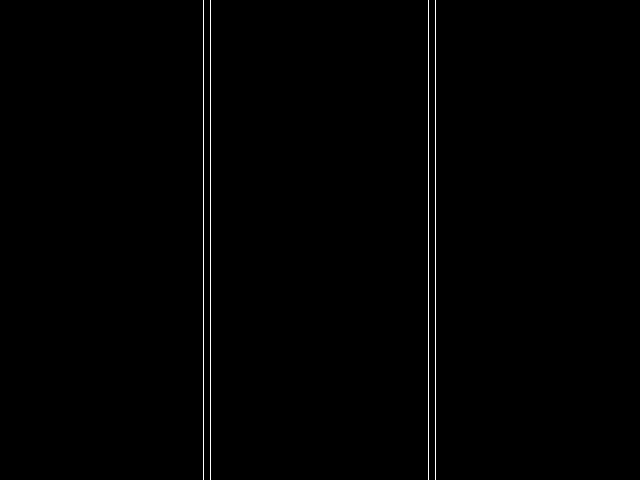

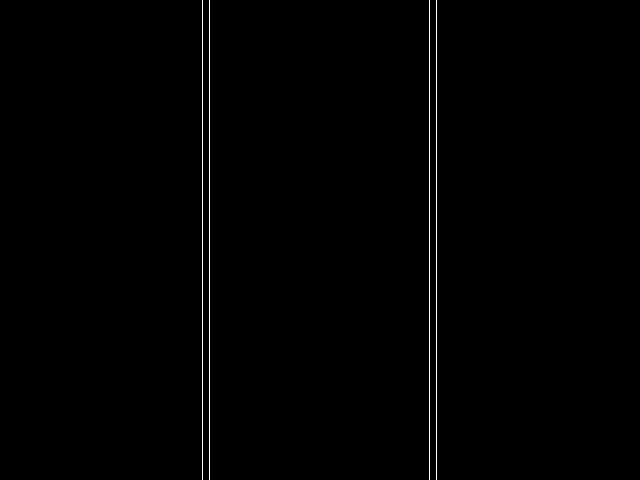

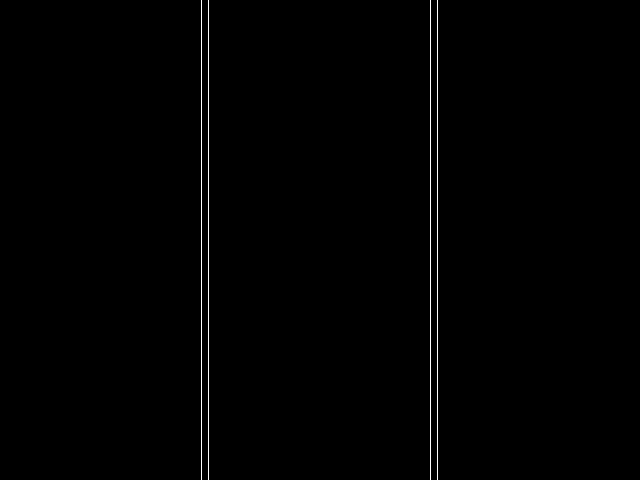

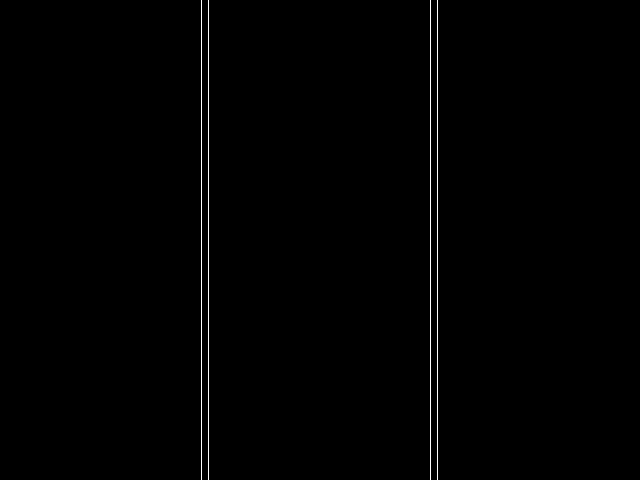

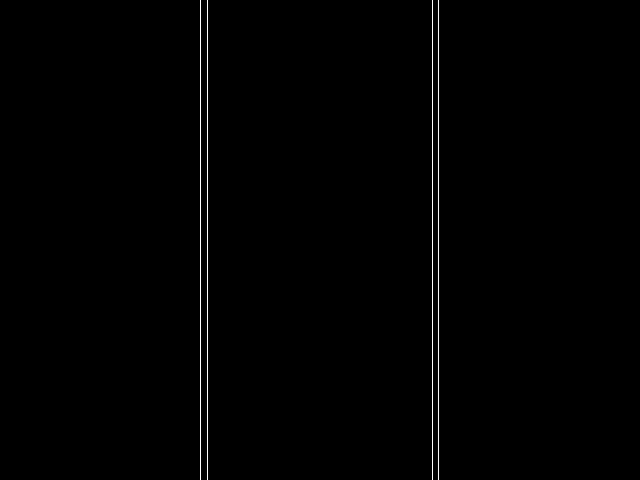

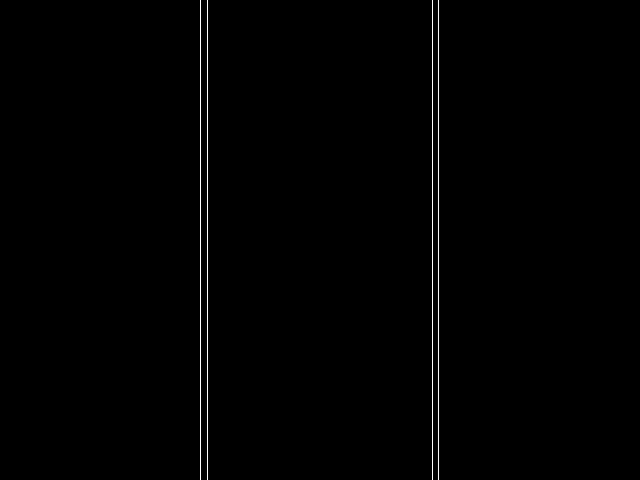

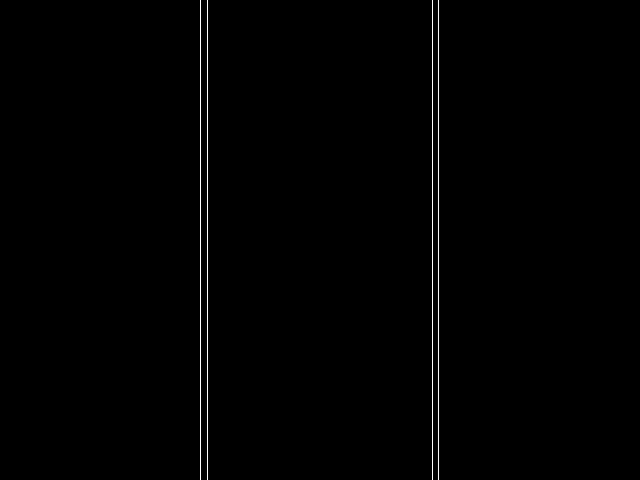

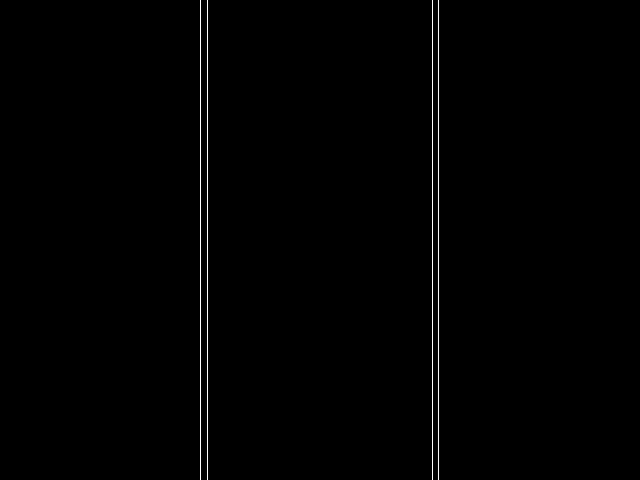

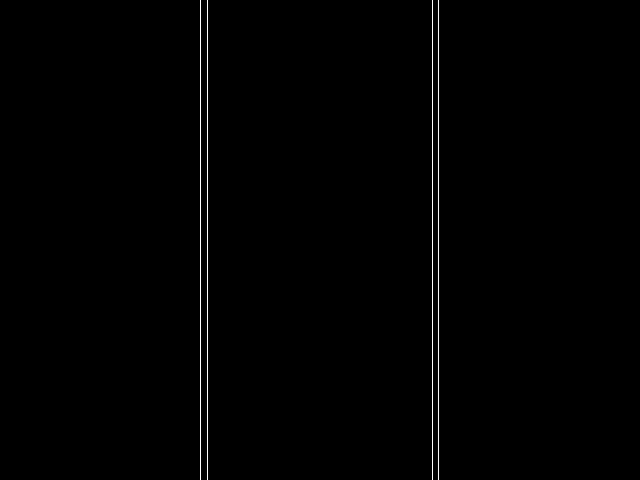

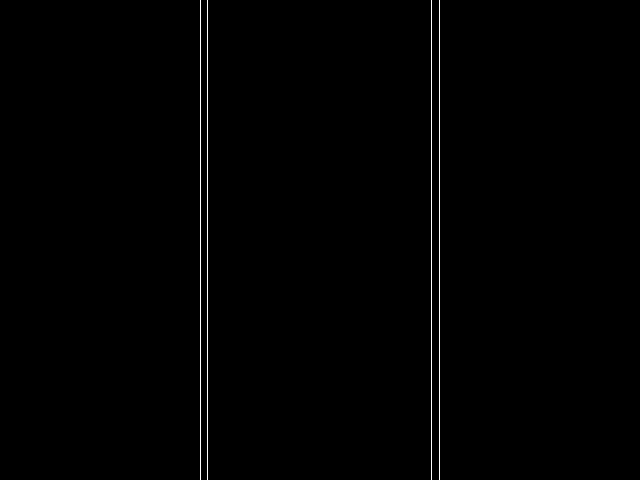

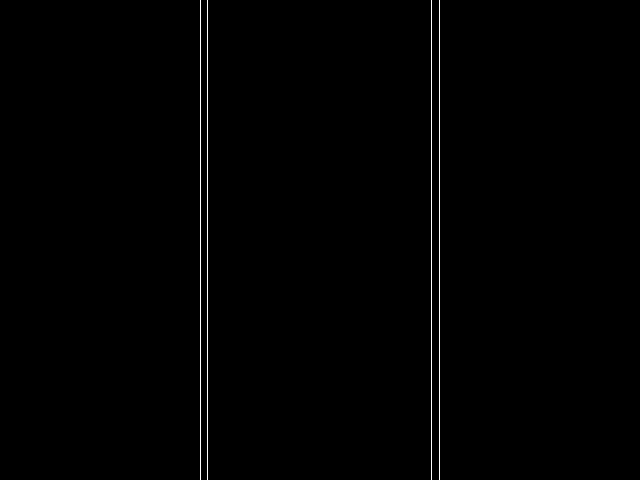

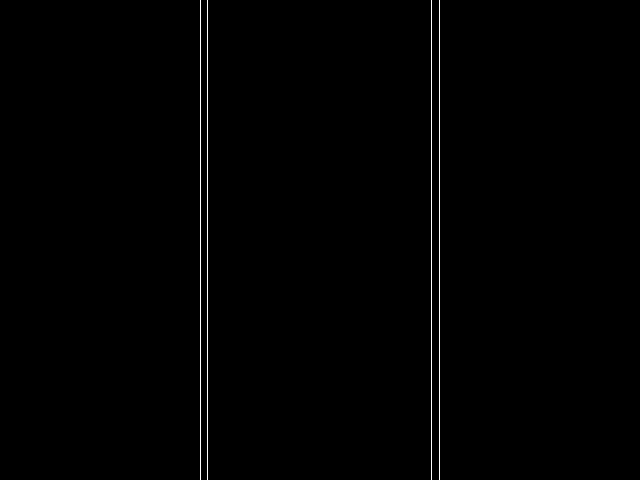

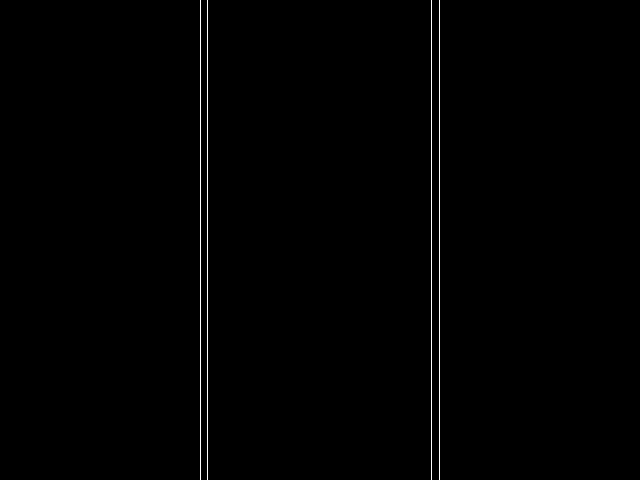

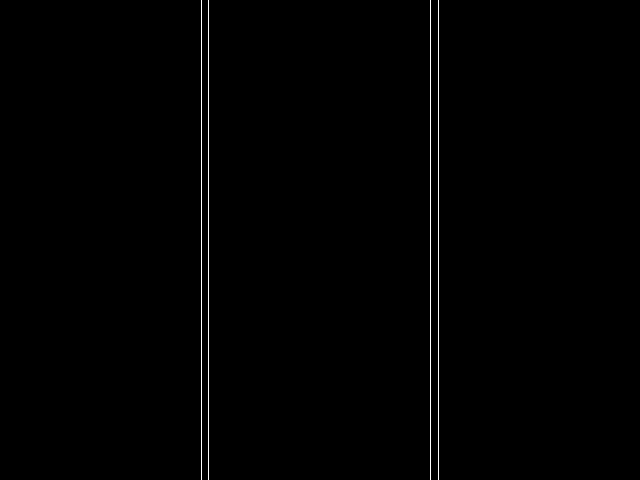

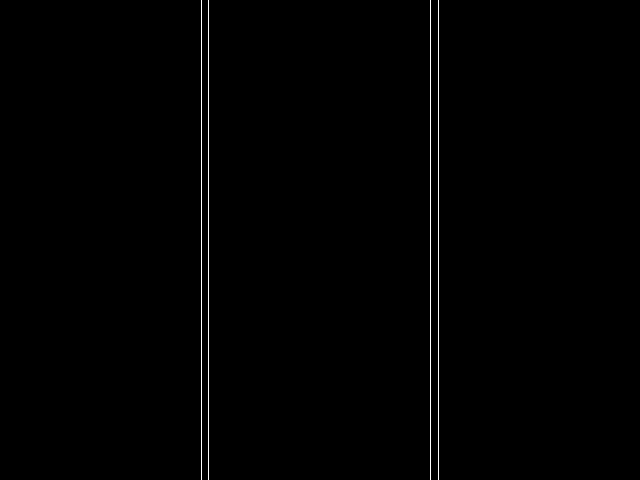

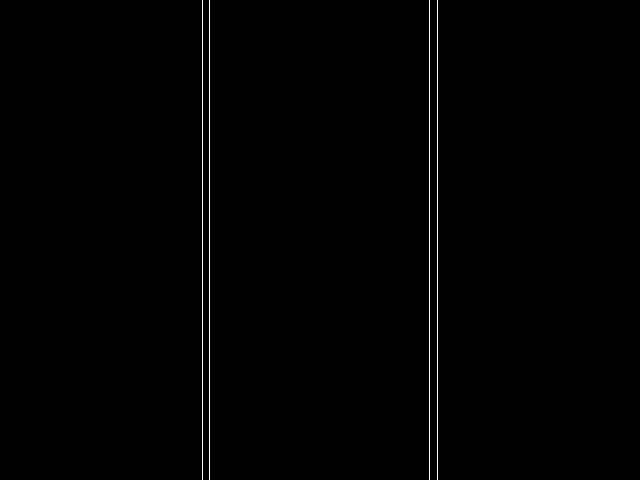

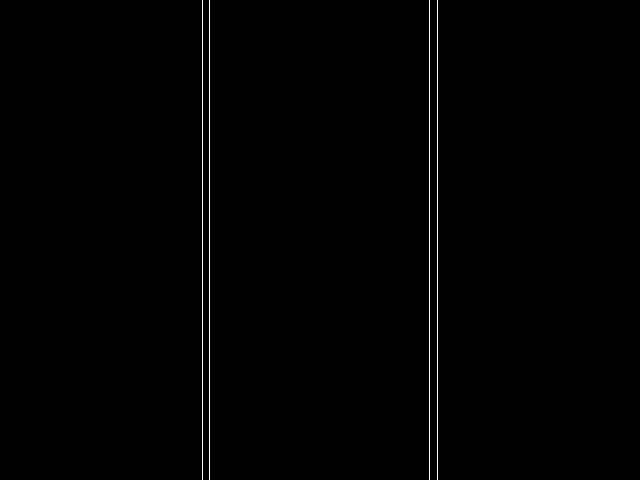

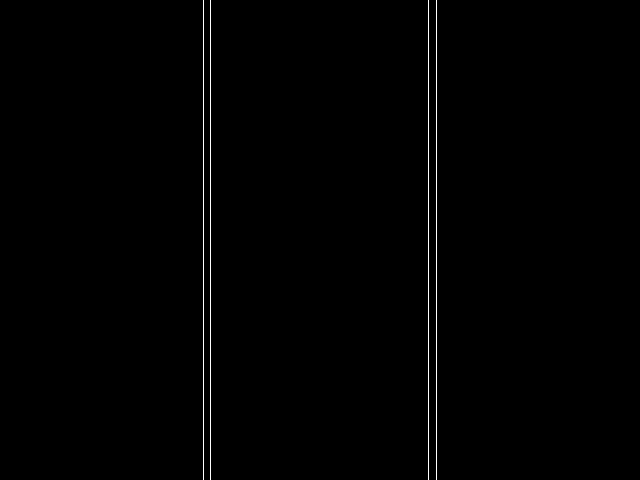

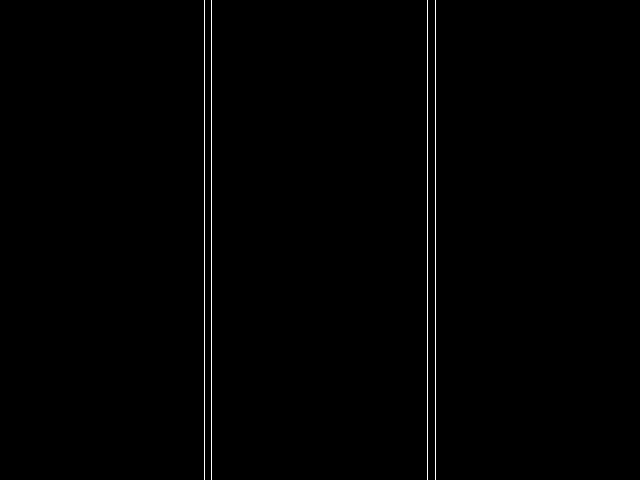

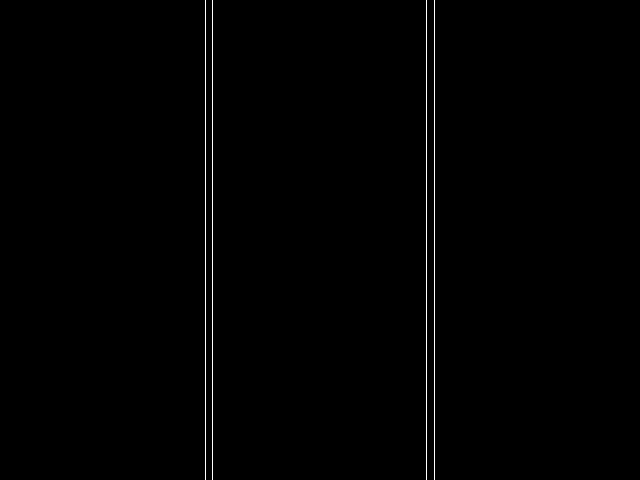

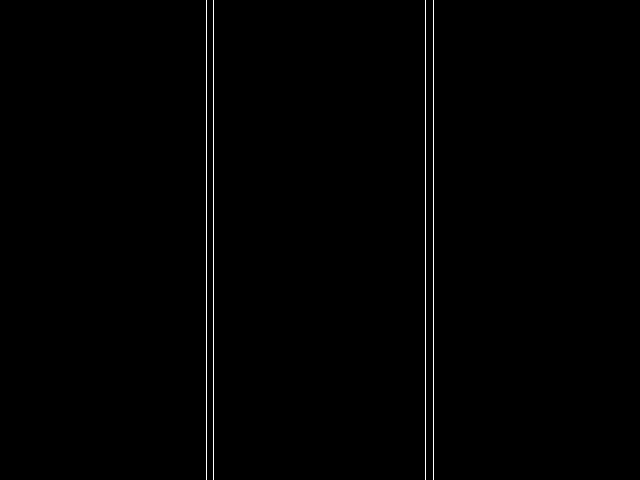

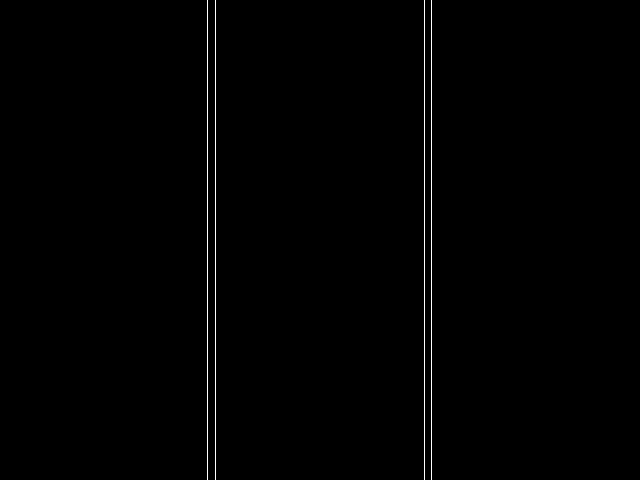

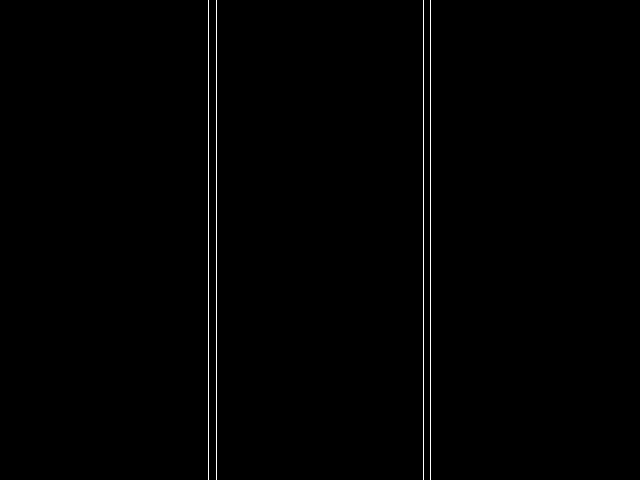

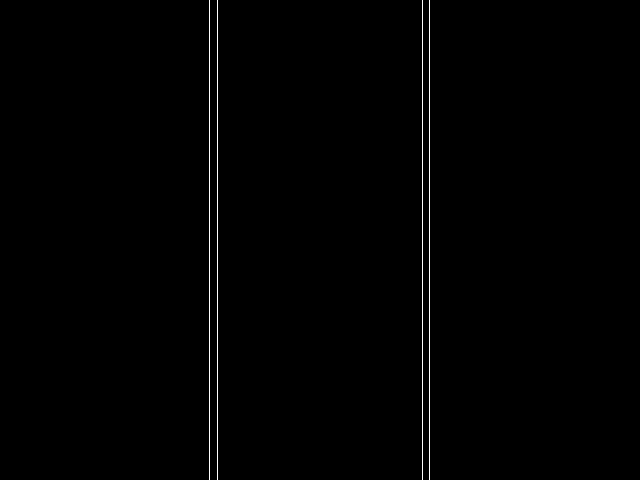

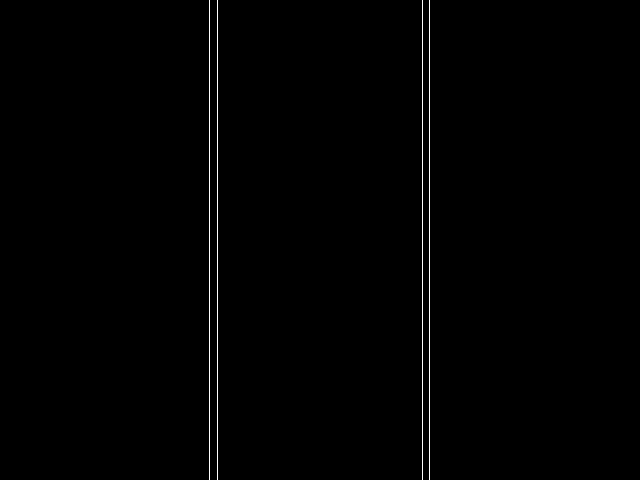

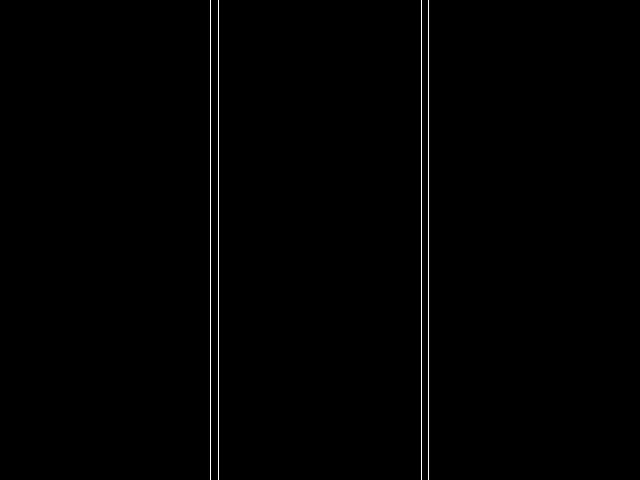

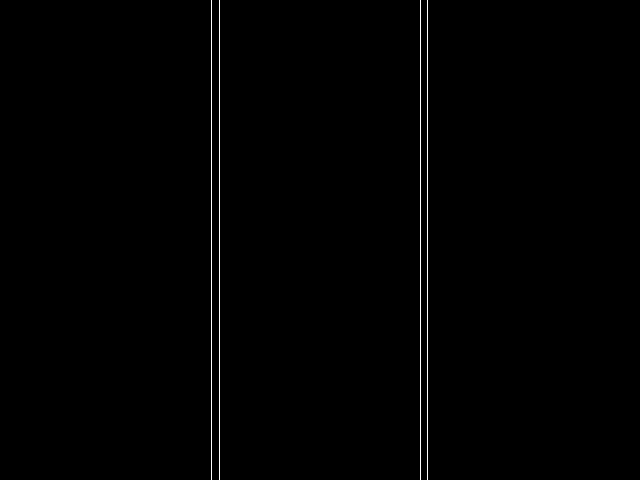

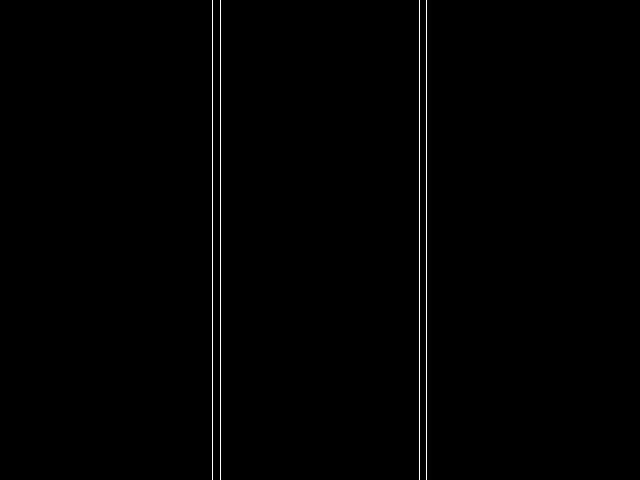

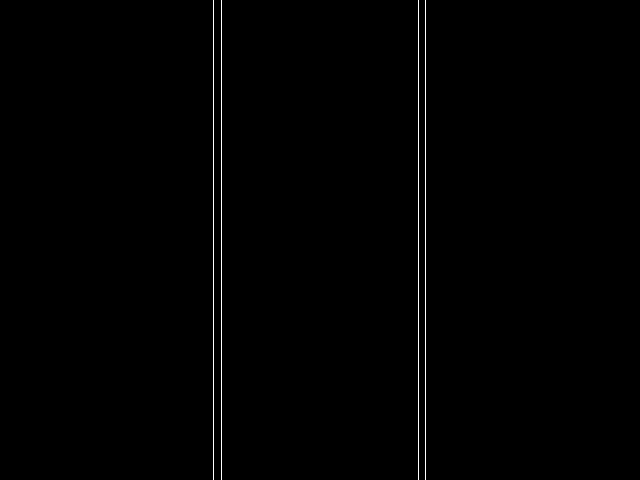

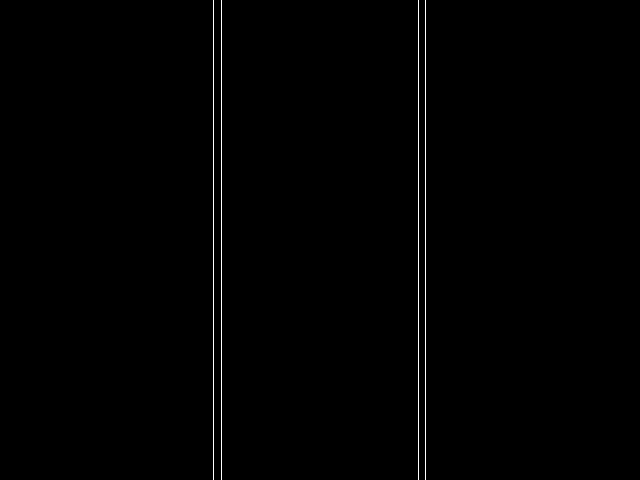

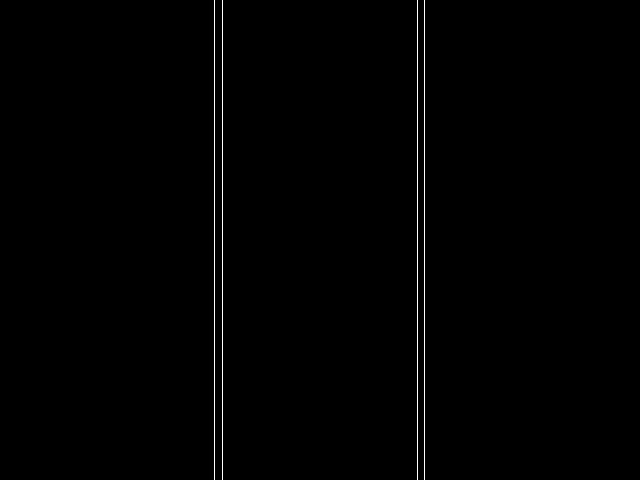

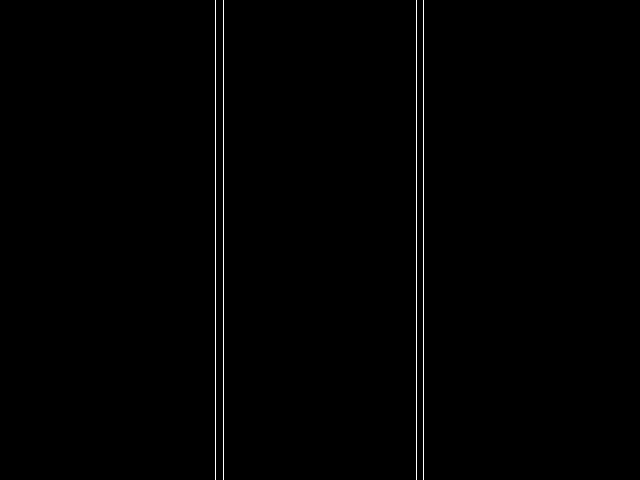

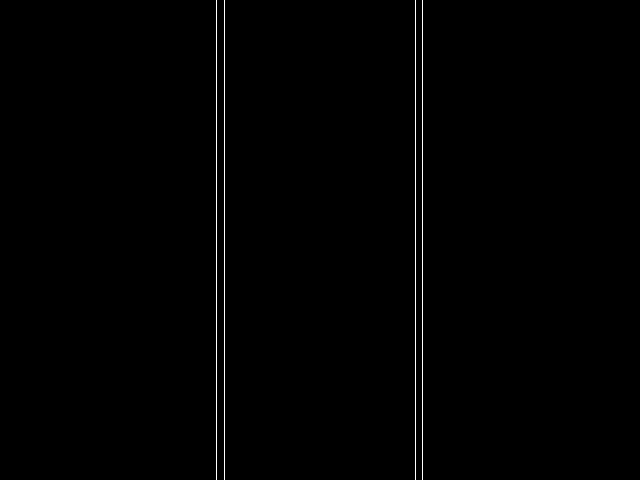

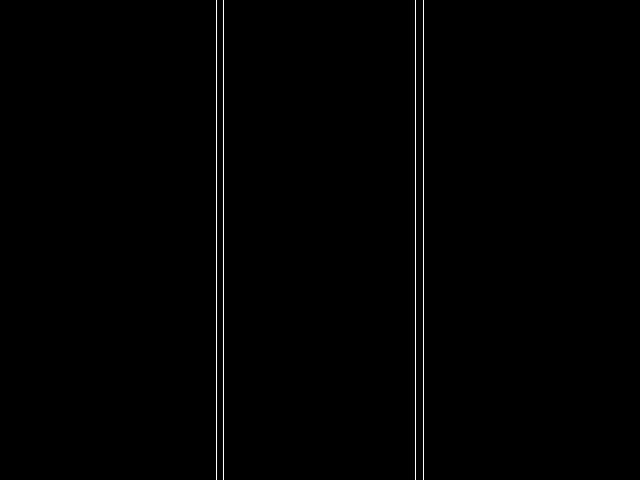

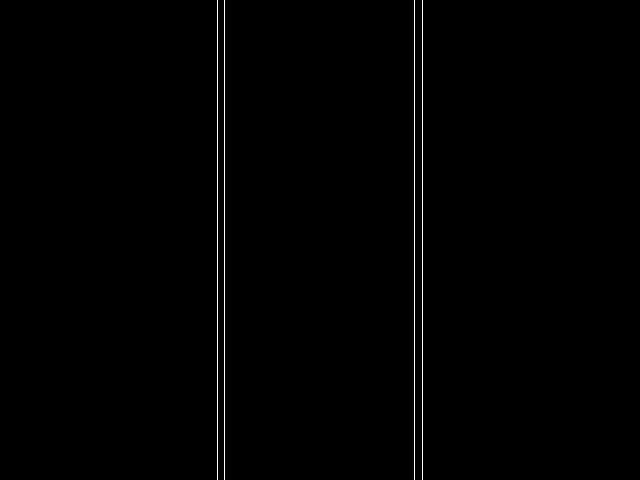

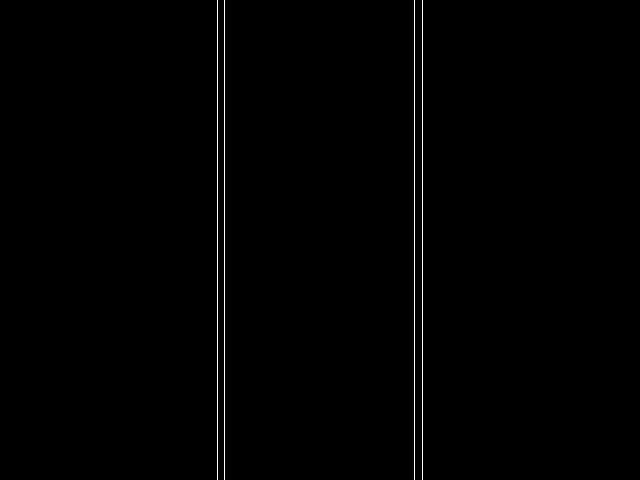

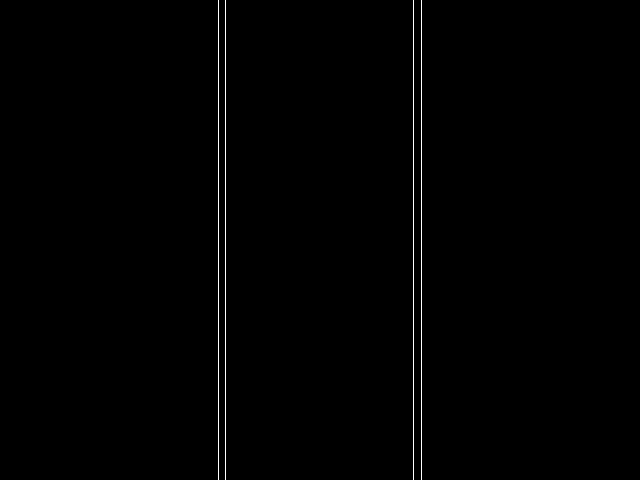

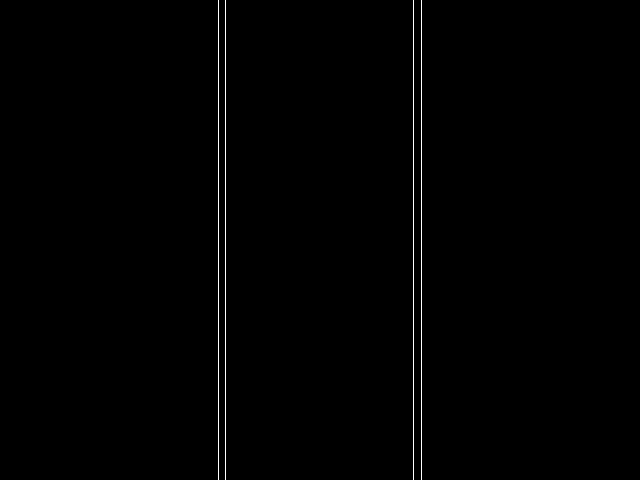

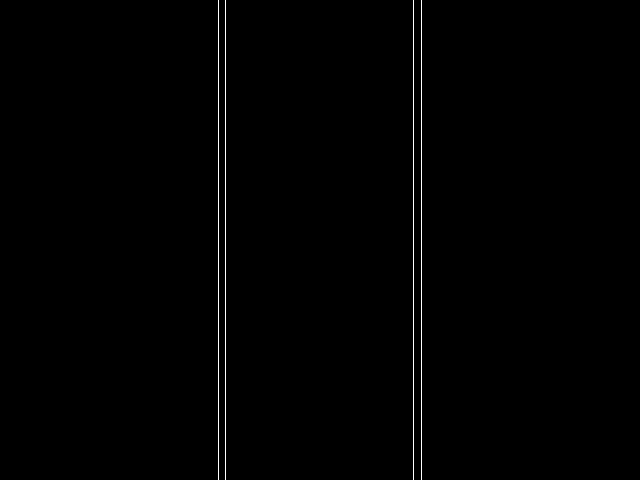

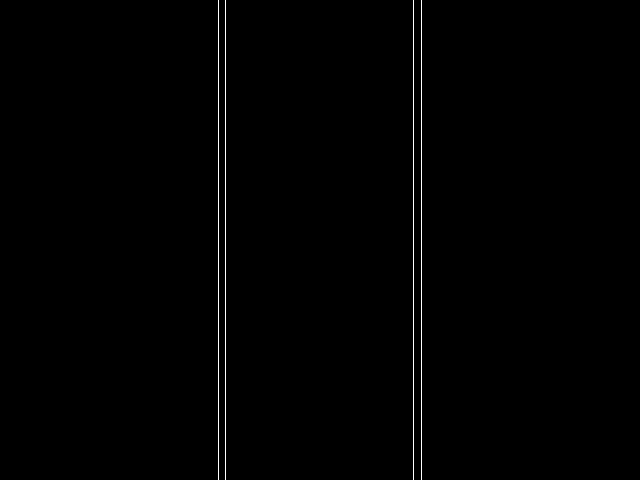

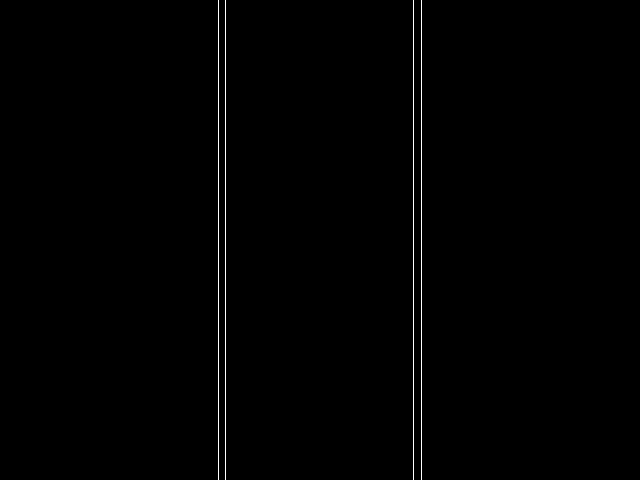

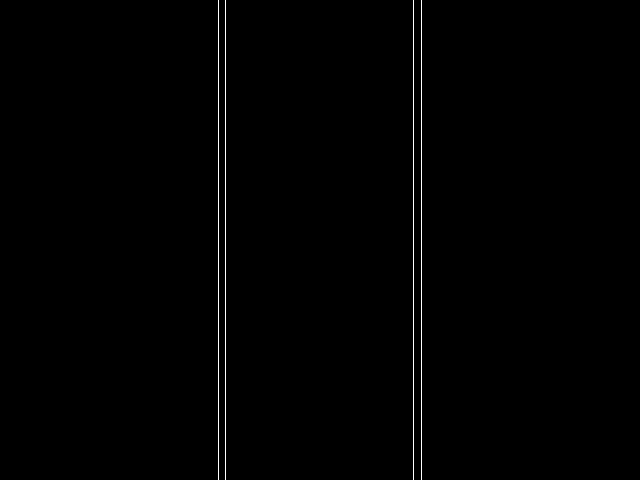

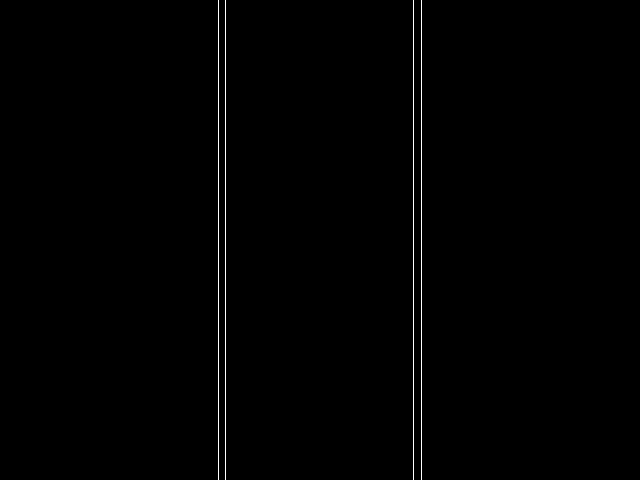

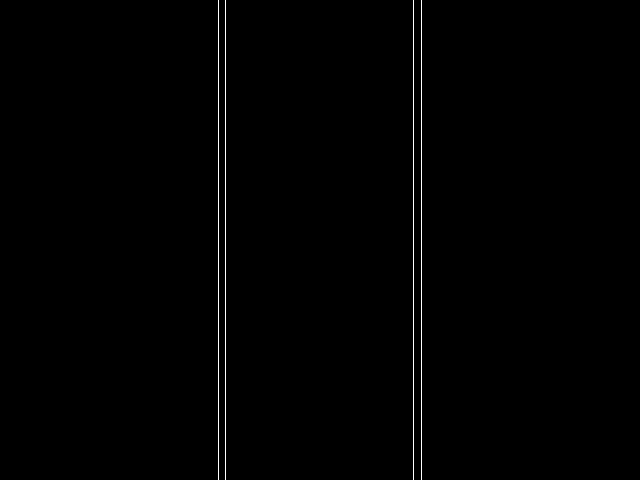

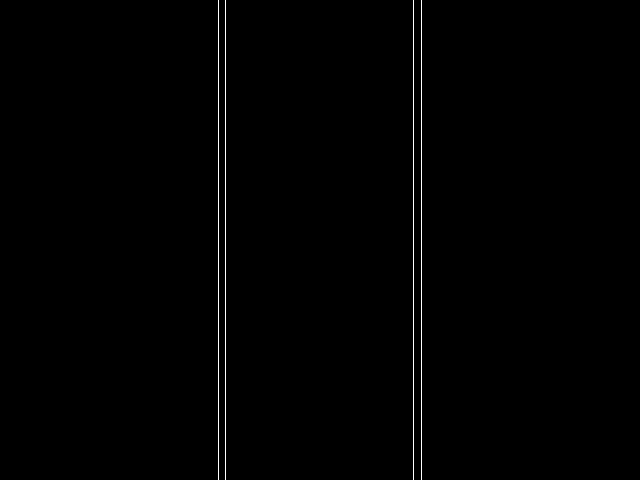

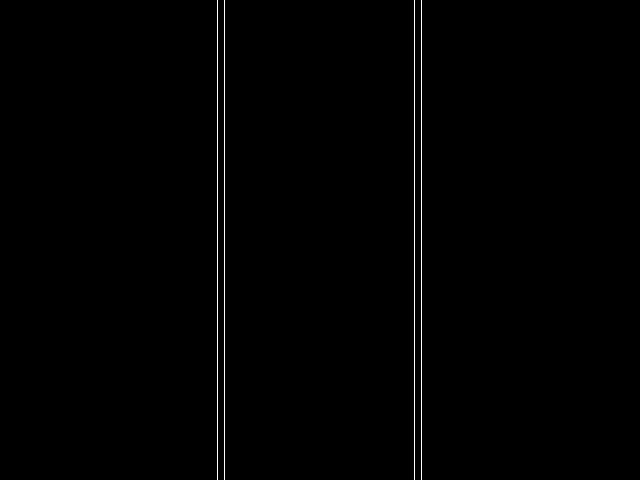

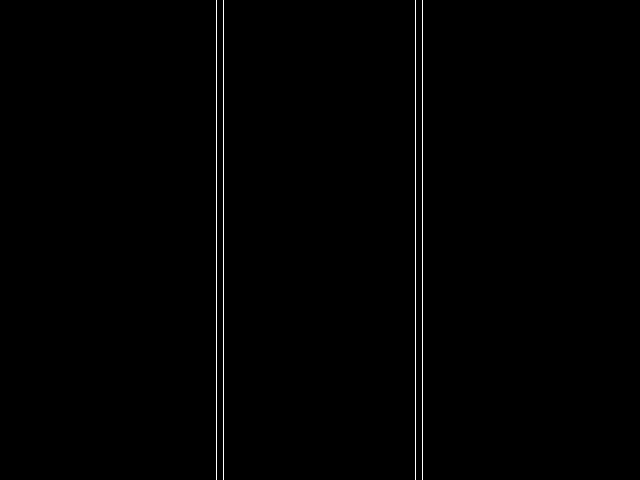

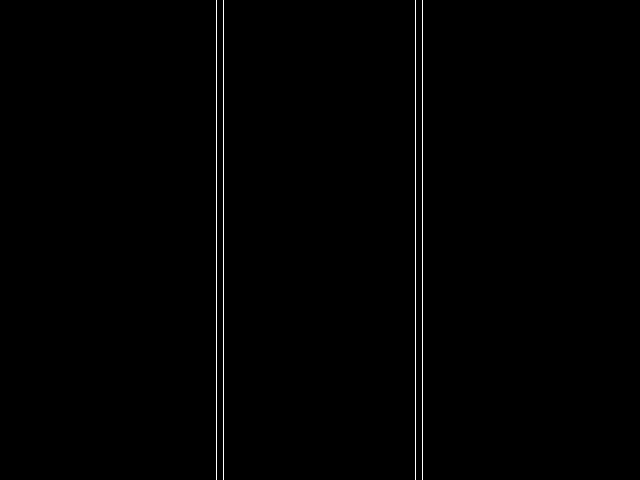

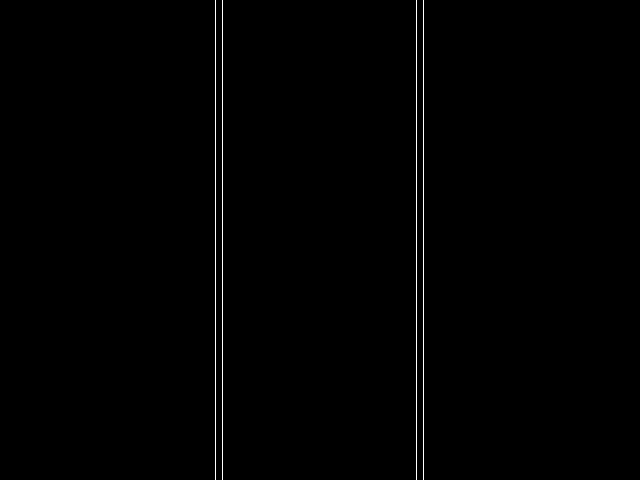

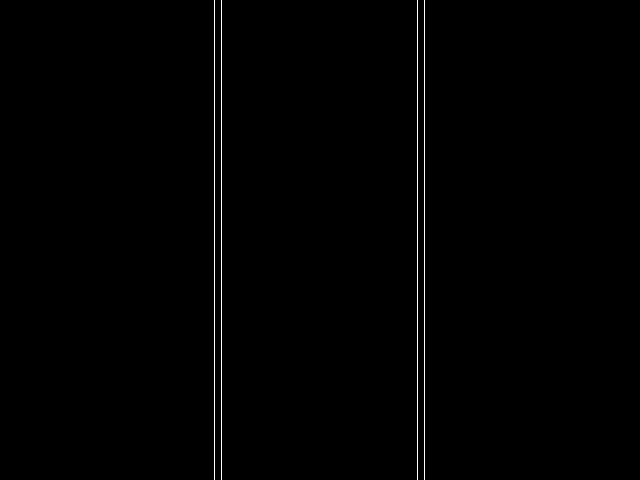

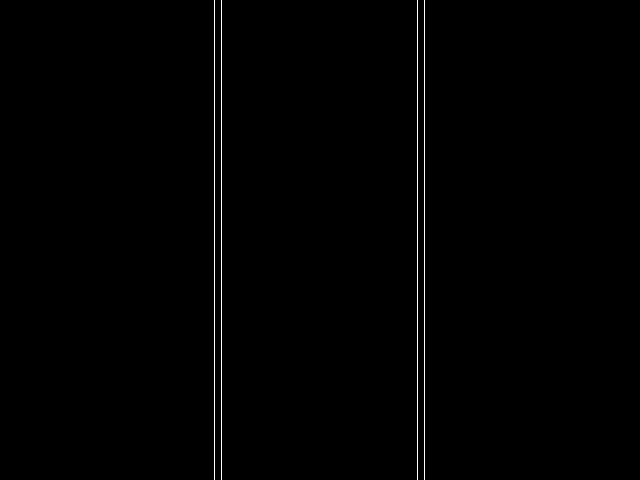

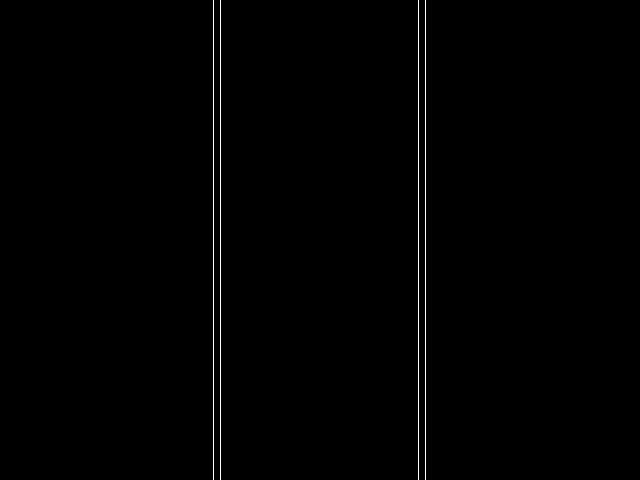

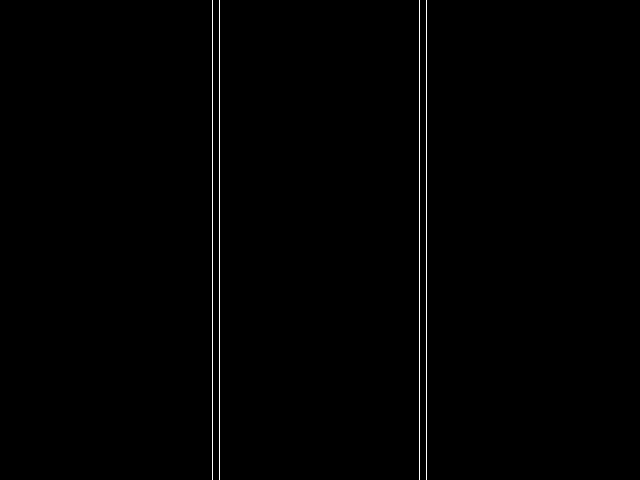

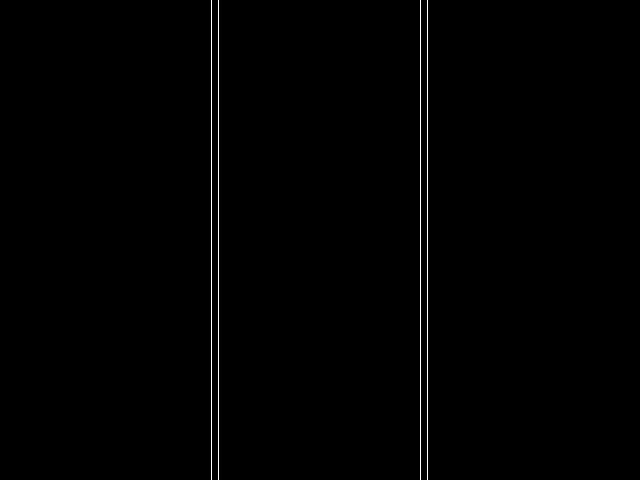

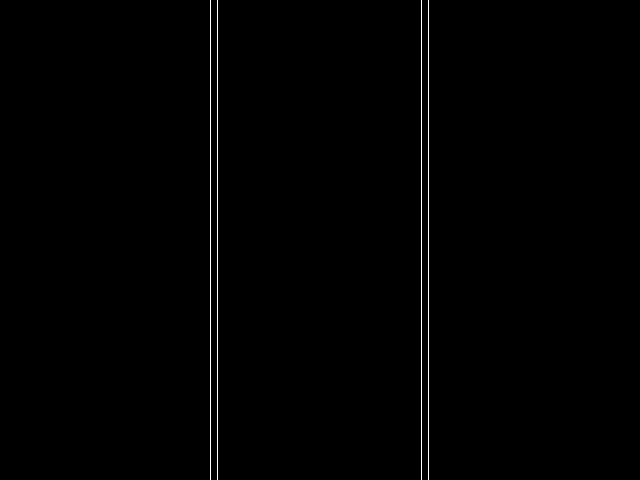

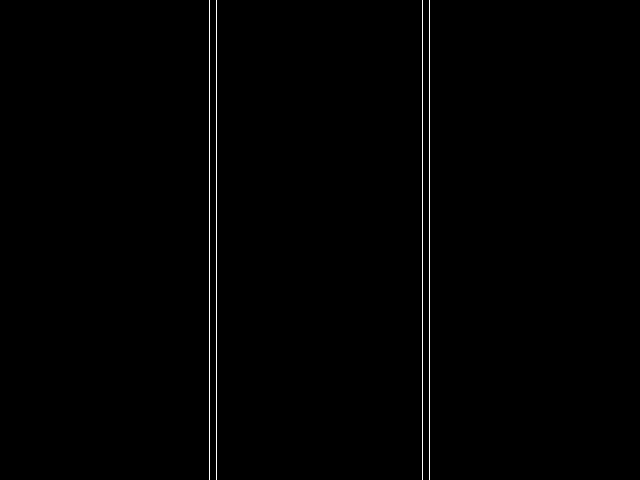

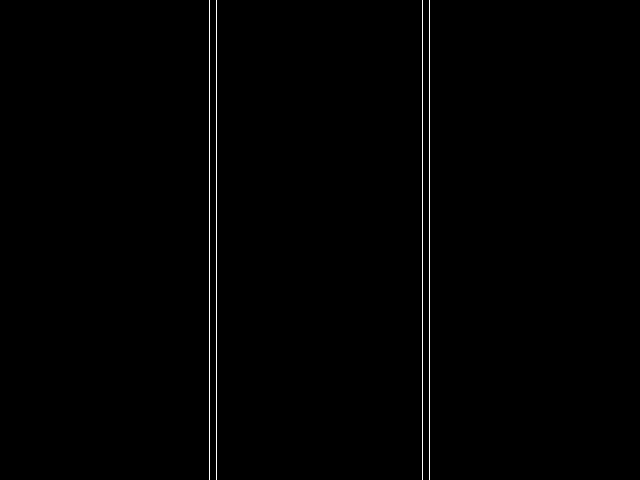

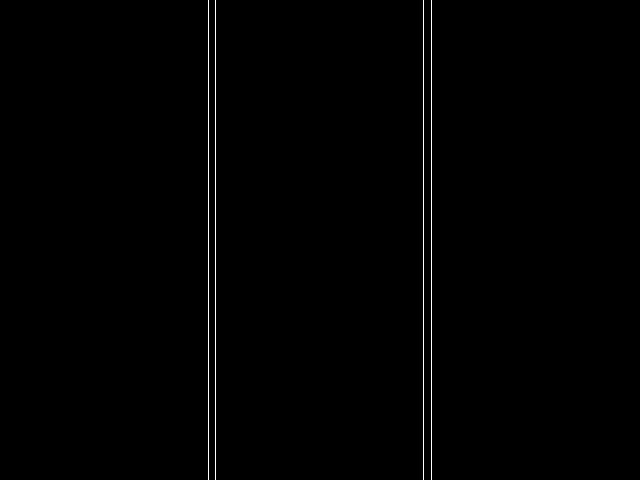

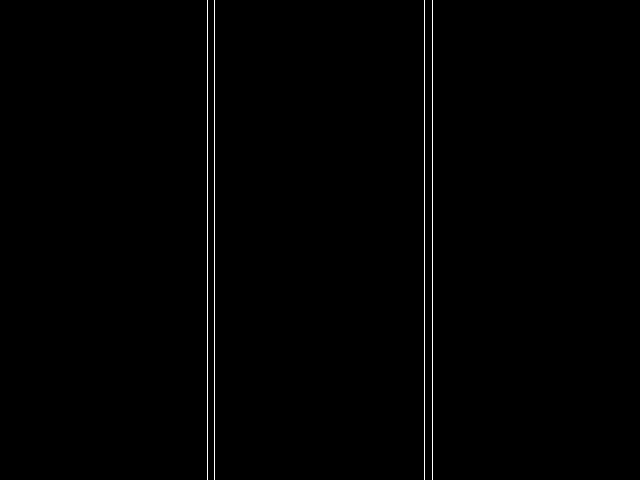

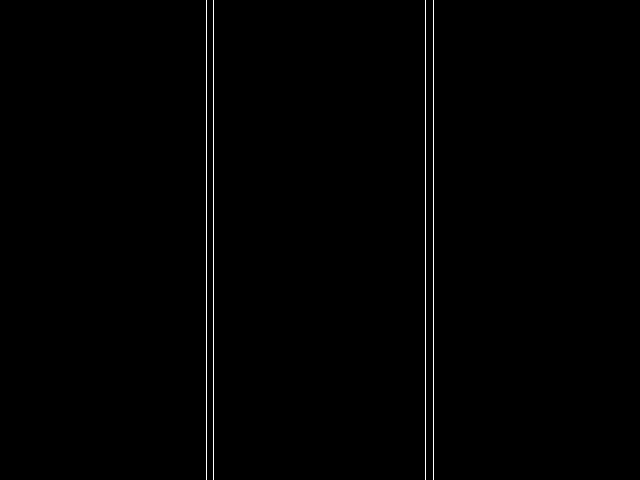

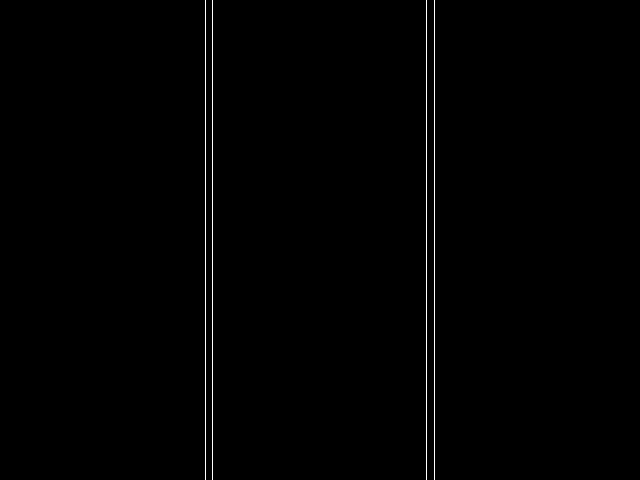

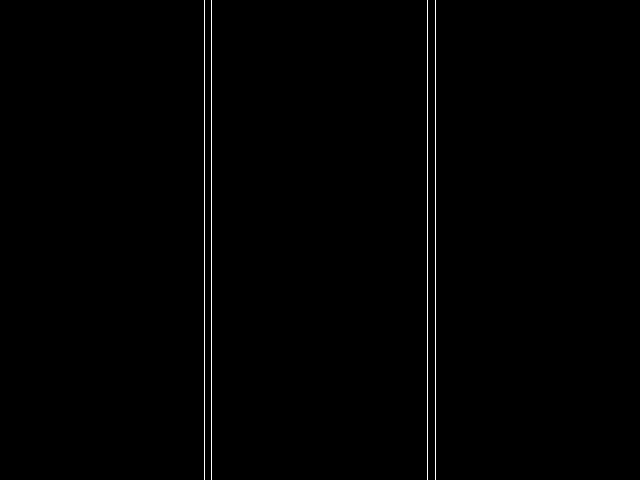

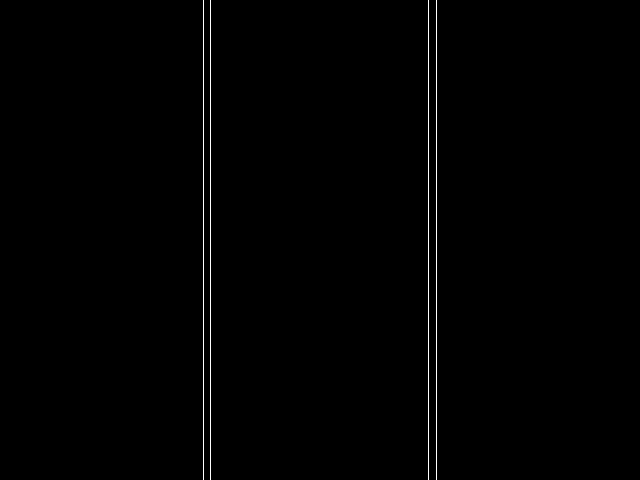

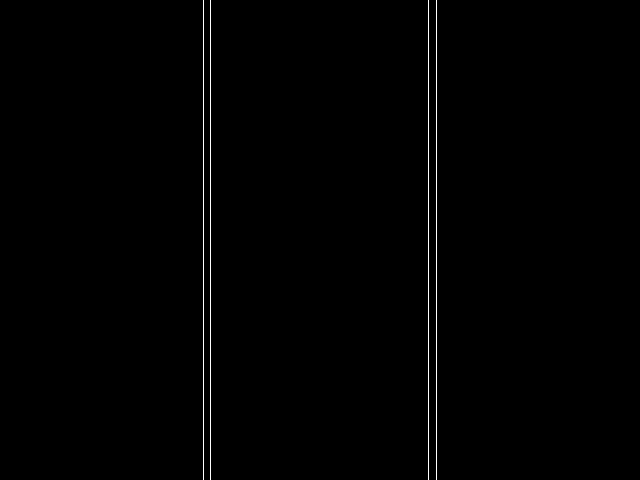

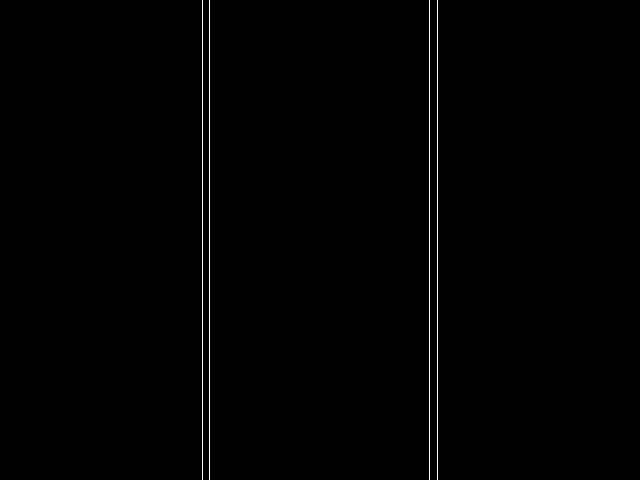

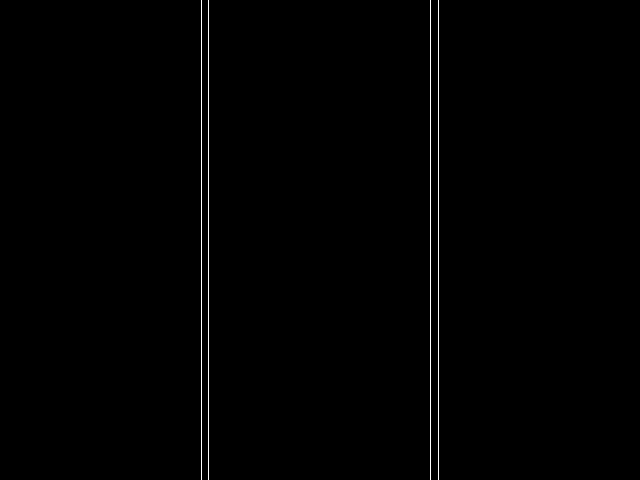

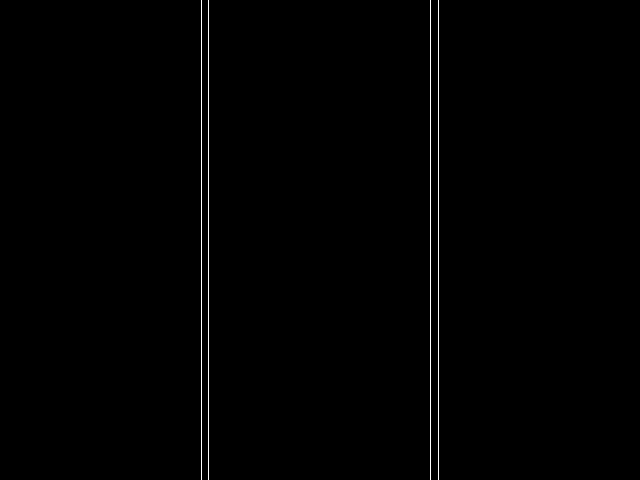

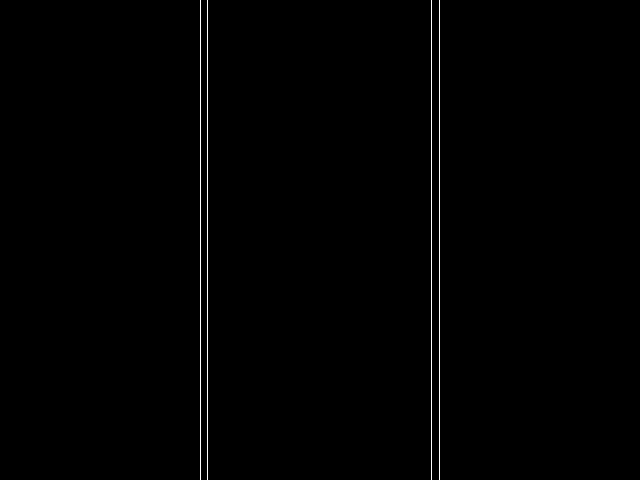

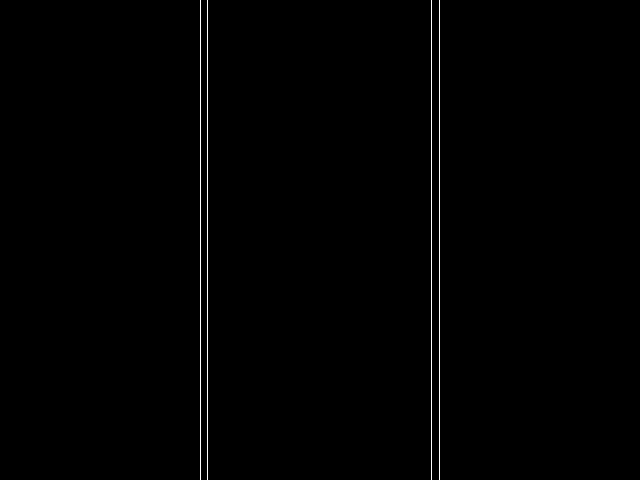

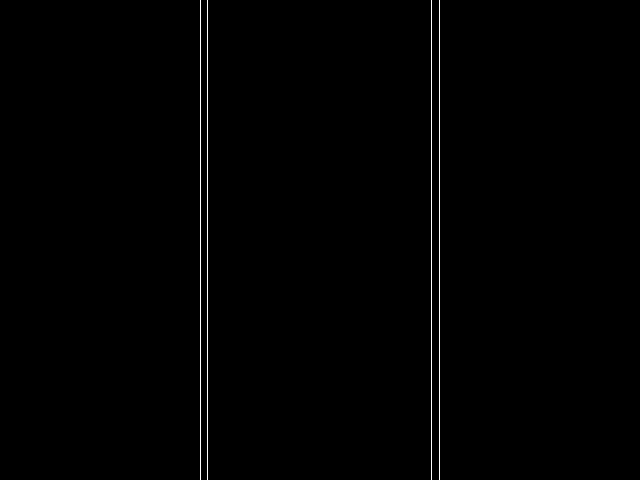

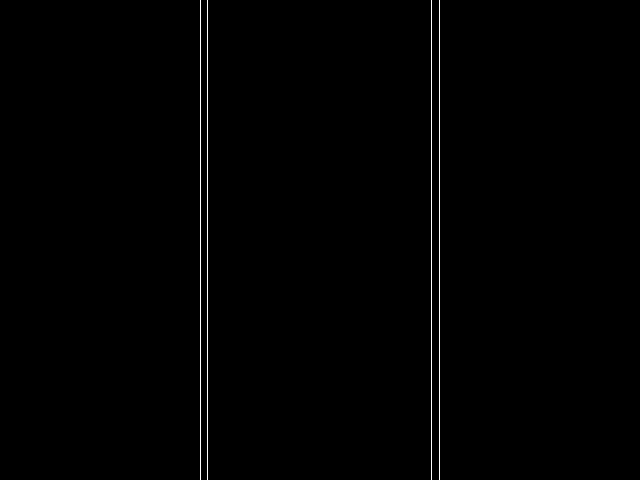

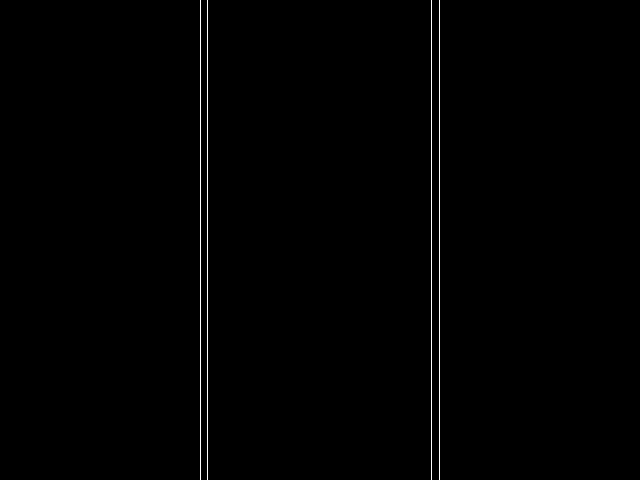

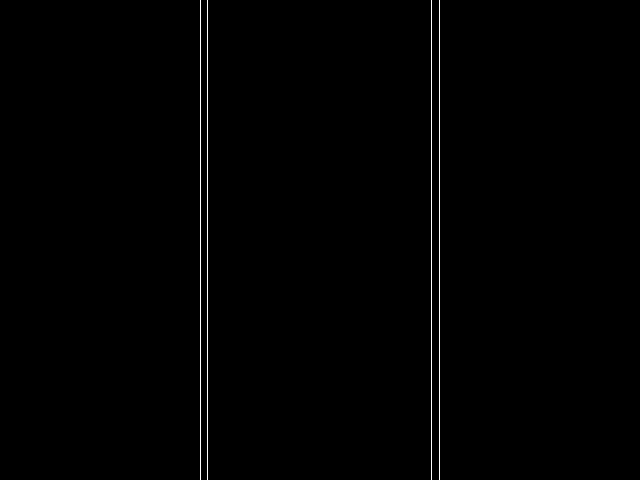

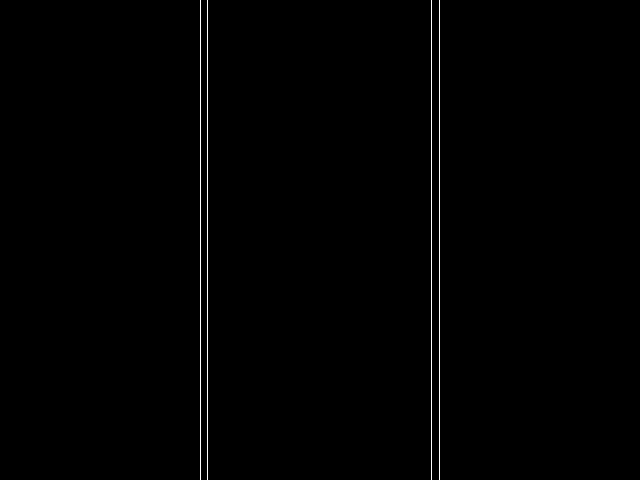

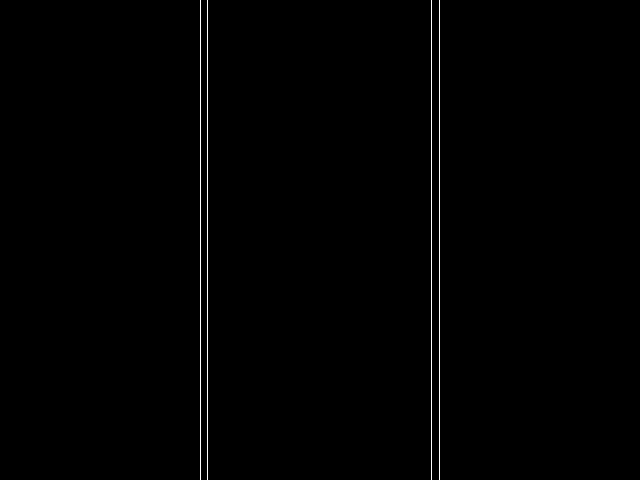

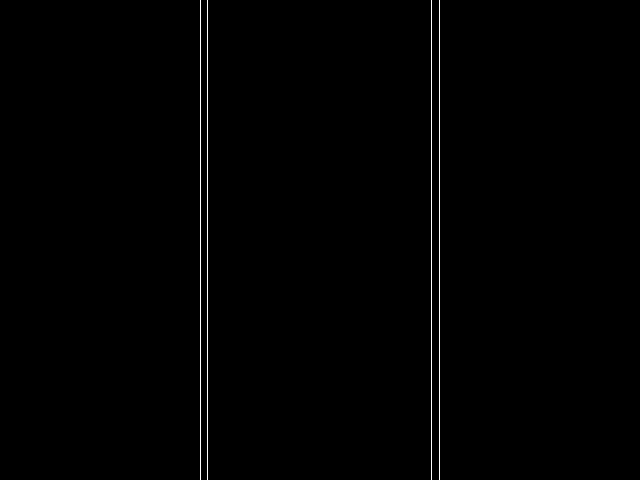

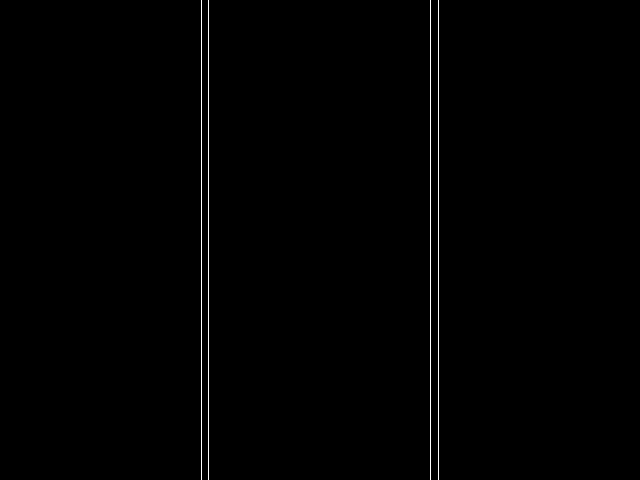

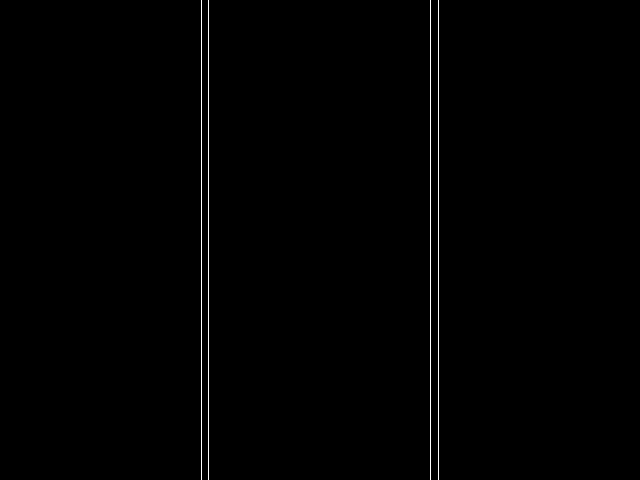

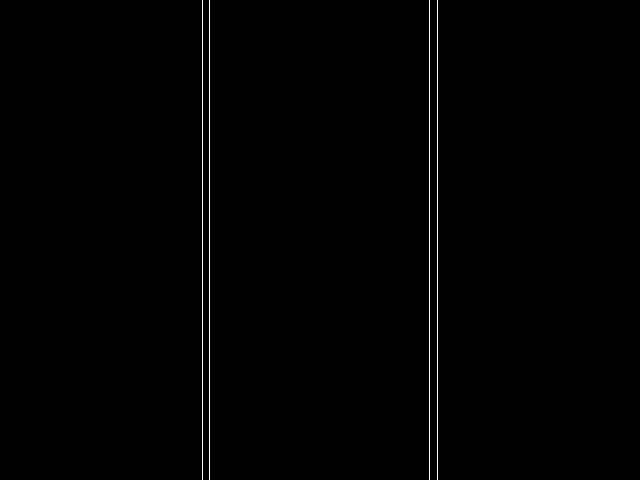

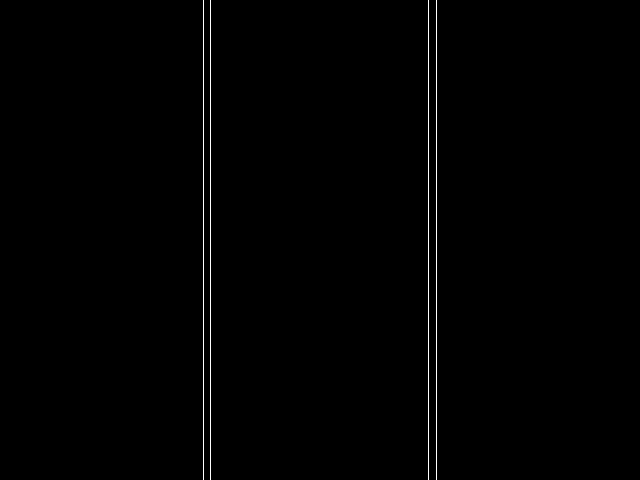

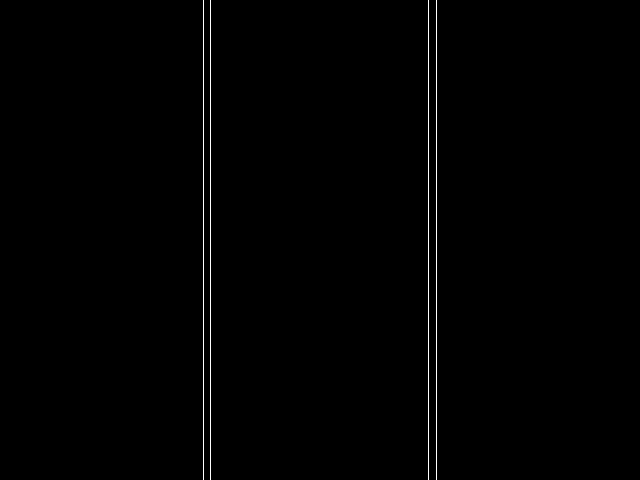

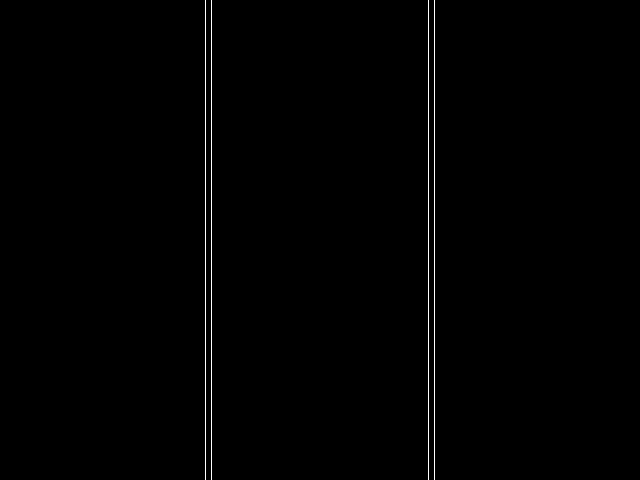

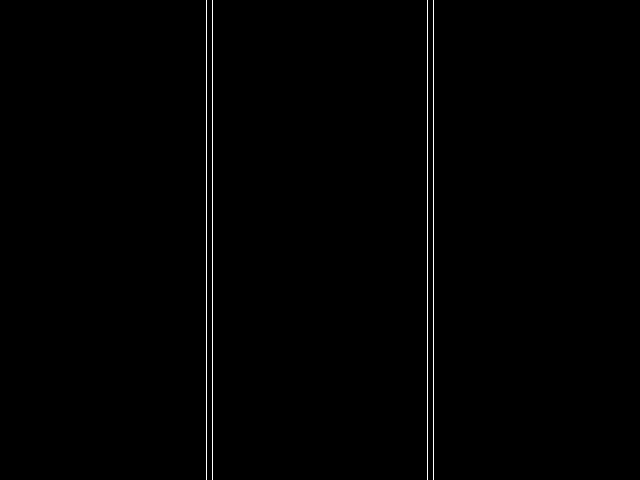

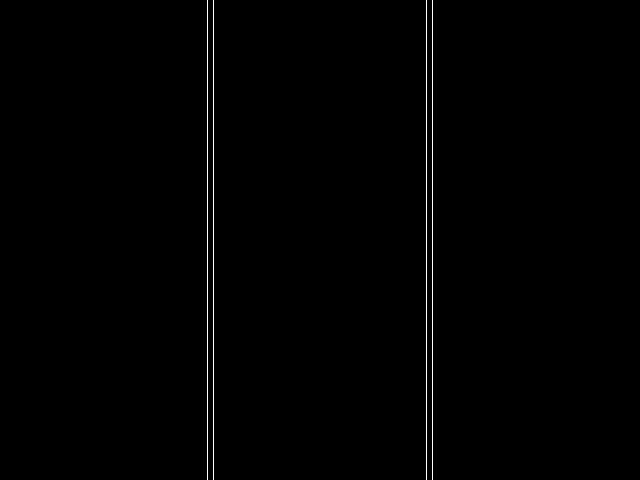

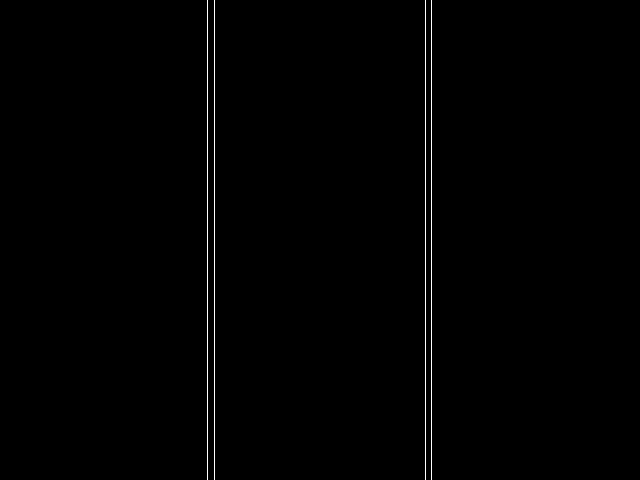

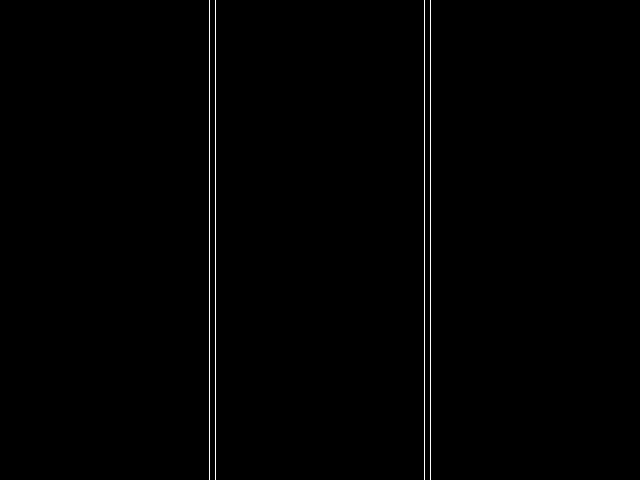

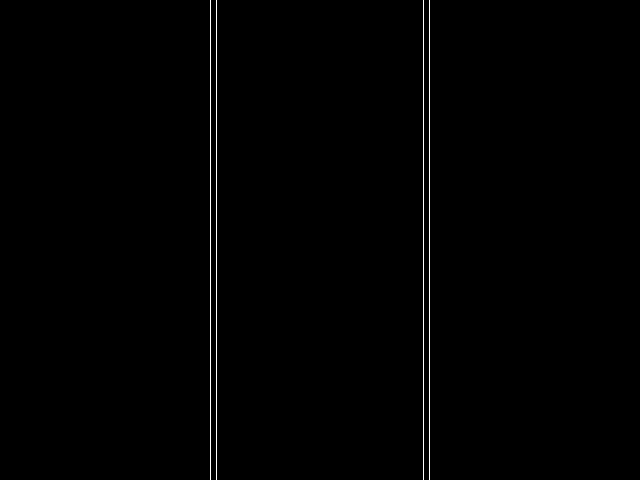

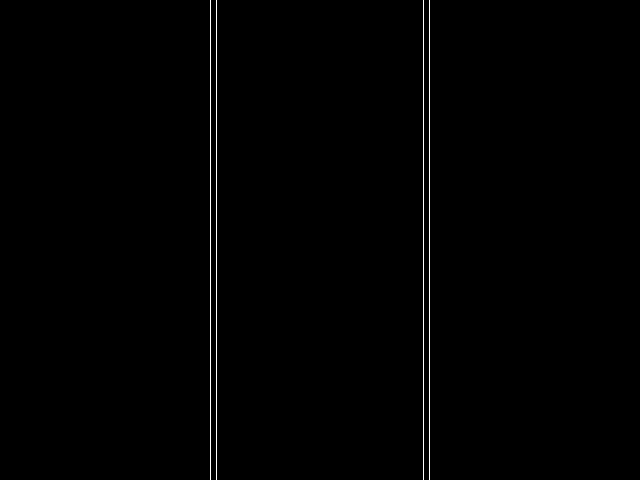

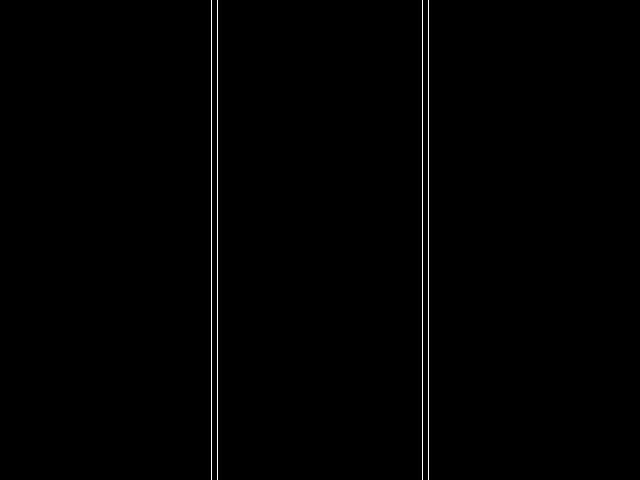

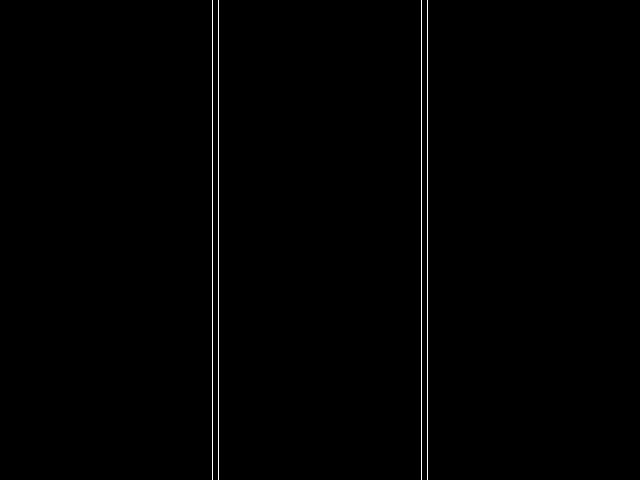

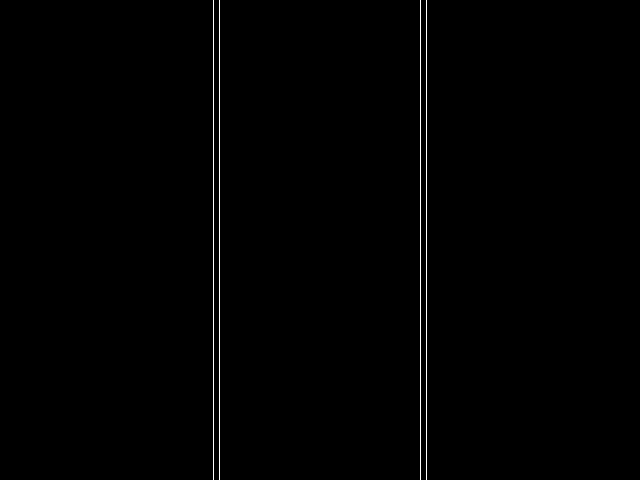

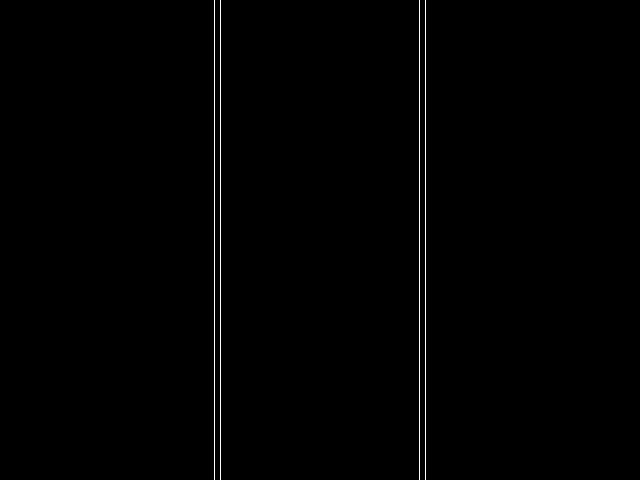

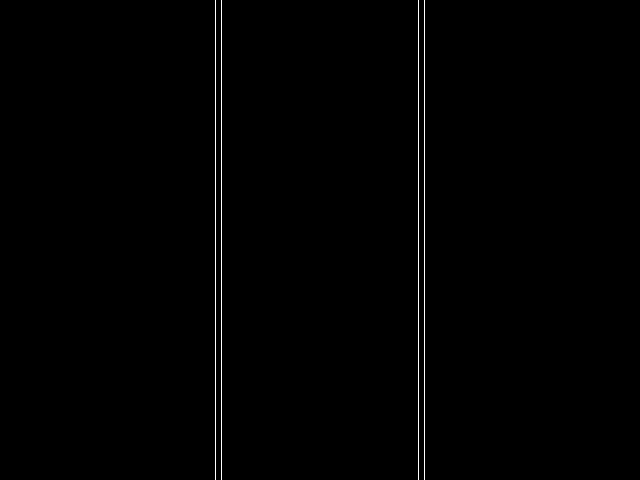

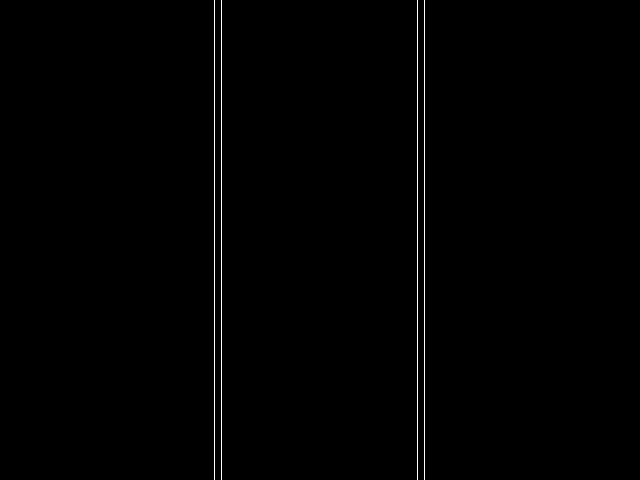

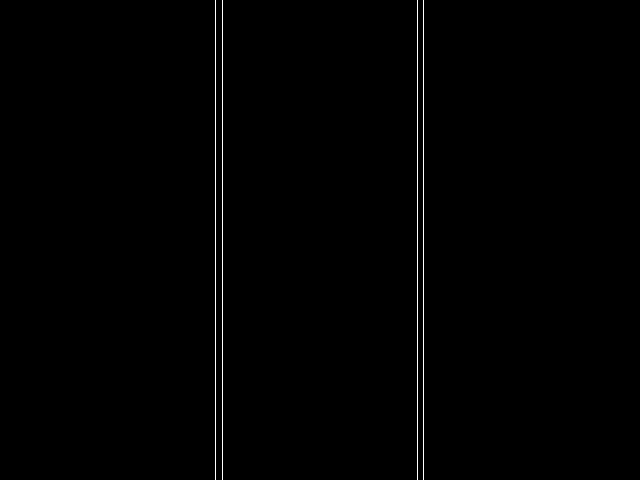

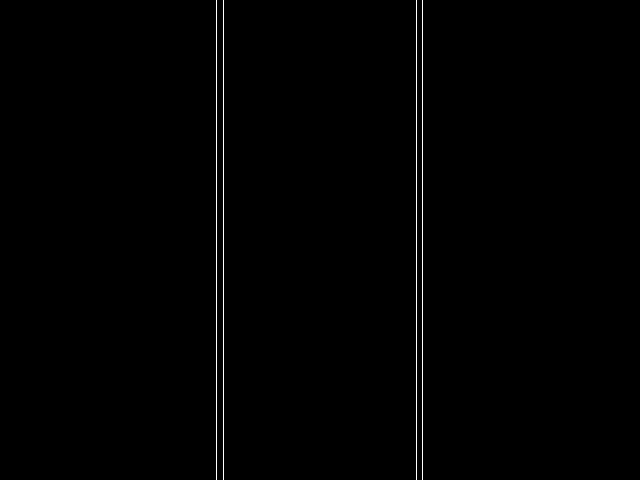

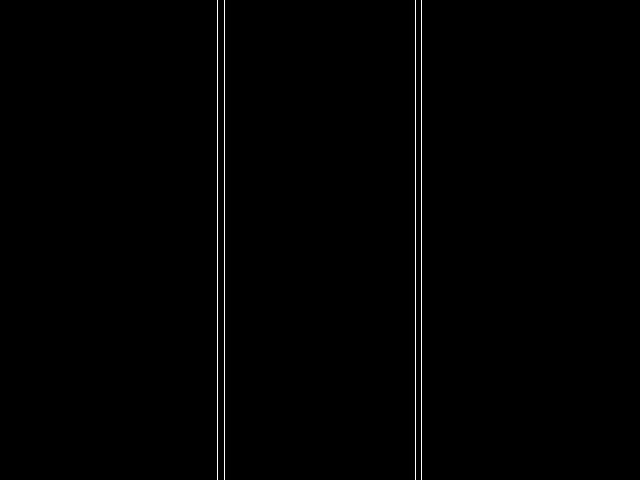

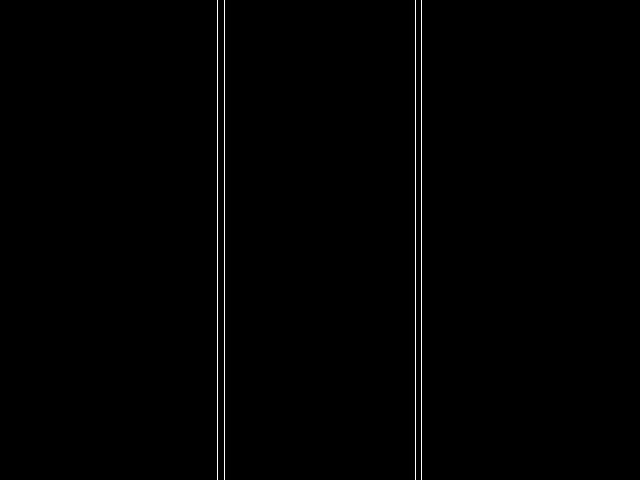

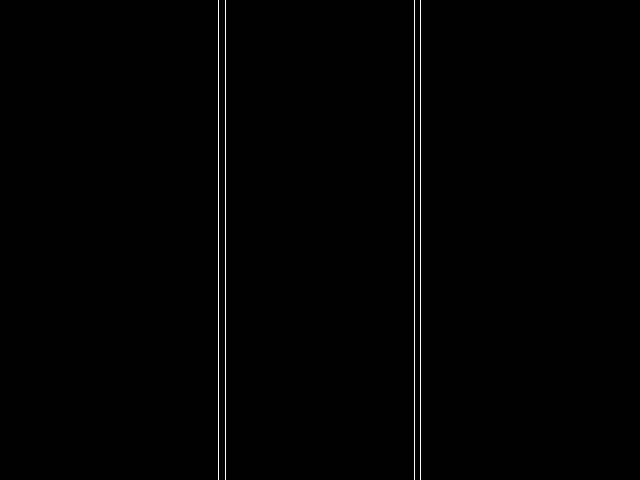

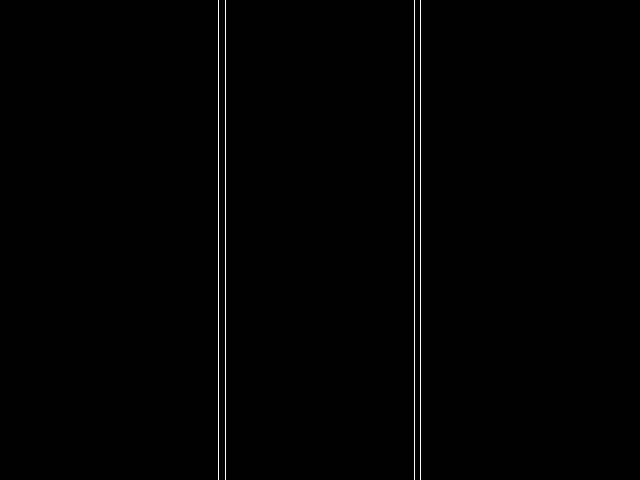

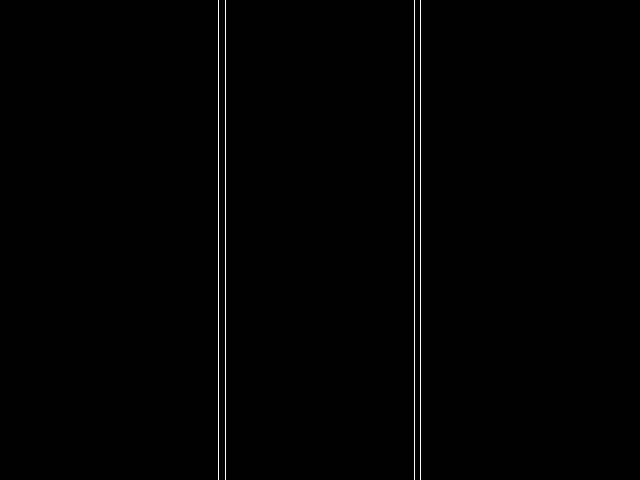

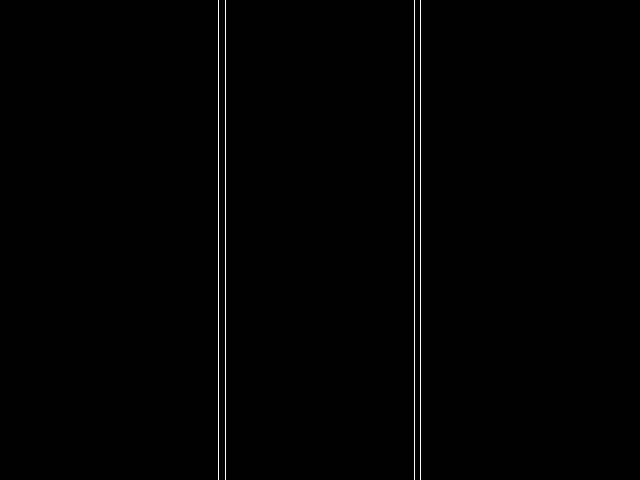

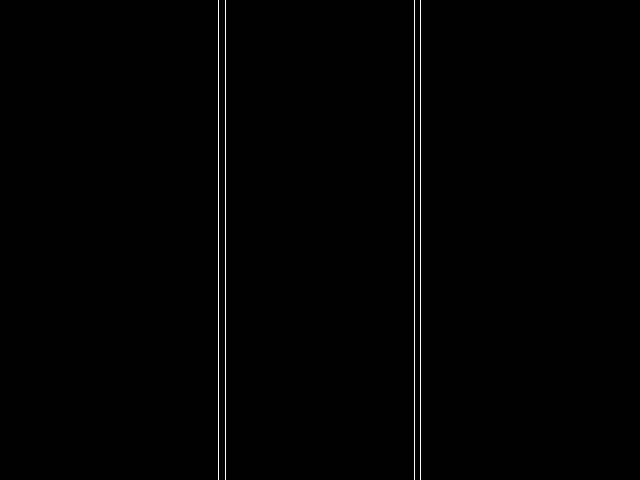

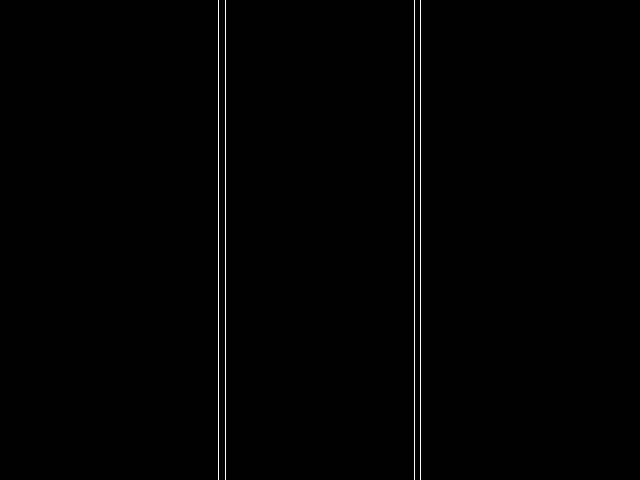

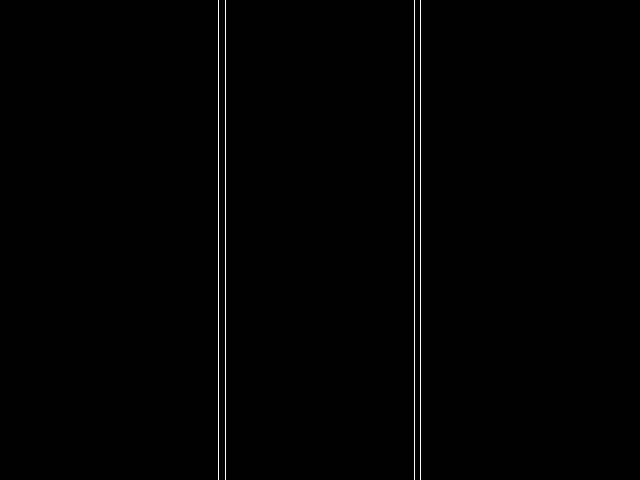

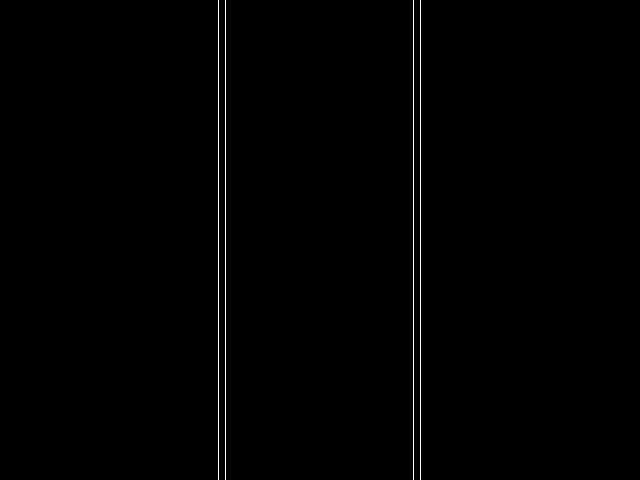

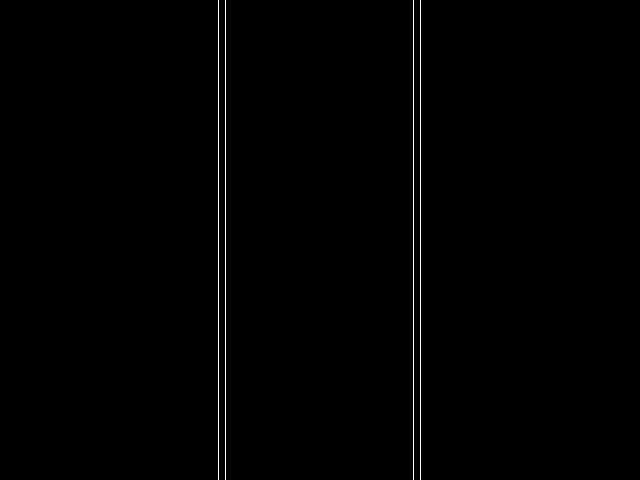

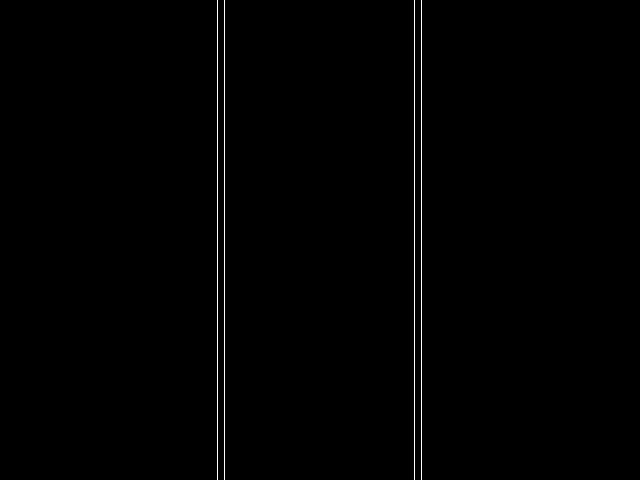

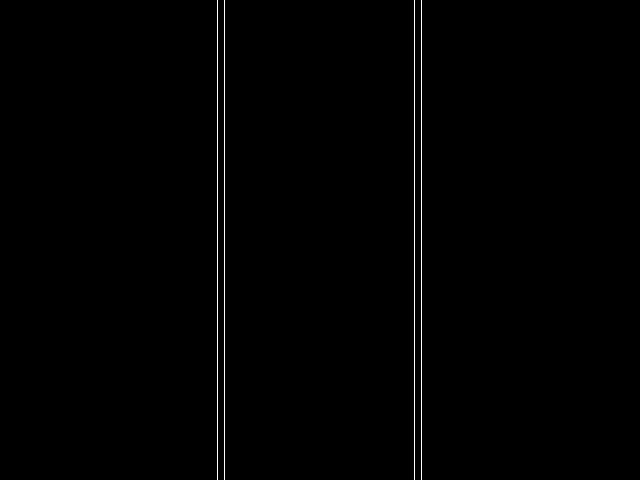

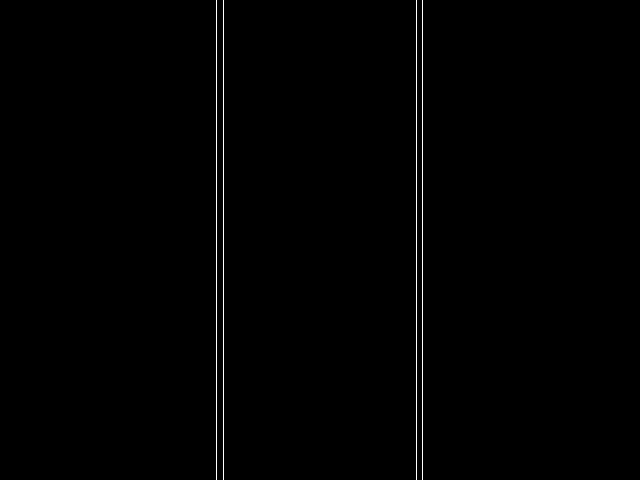

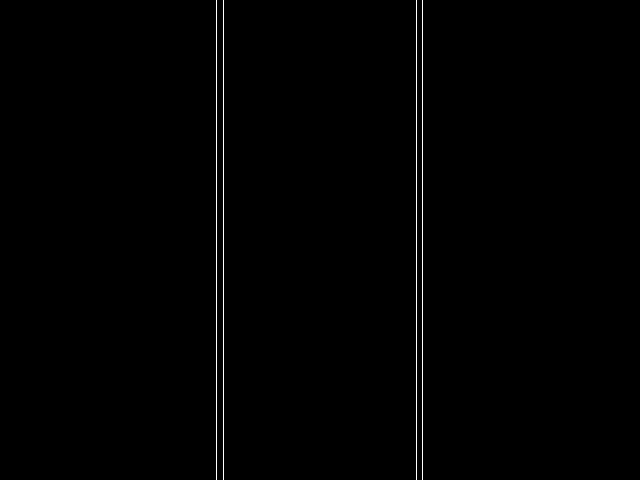

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Video settings
width, height = 640, 480
fps = 30
seconds = 5  # Duration of the video

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('lane_video.mp4', fourcc, fps, (width, height))

# Function to draw lanes
def draw_lanes(frame, offset):
    # Draw road background
    frame[:] = (50, 50, 50)  # Dark gray road

    # Lane line properties
    lane_color = (255, 255, 255)  # White lanes
    thickness = 5

    # Draw two lane markings
    cv2.line(frame, (width//3 + offset, height), (width//3 + offset, 0), lane_color, thickness)
    cv2.line(frame, (2*width//3 - offset, height), (2*width//3 - offset, 0), lane_color, thickness)

    return frame

# Generate frames
for i in range(fps * seconds):
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    offset = int(10 * np.sin(i * 0.1))  # Simulating slight lane movement
    frame = draw_lanes(frame, offset)
    out.write(frame)

# Release the video writer
out.release()
cv2.destroyAllWindows()

print("Synthetic lane detection video saved as lane_video.mp4")

# Lane detection function
def detect_lanes(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Edge detection
        edges = cv2.Canny(blurred, 50, 150)

        # Display output
        cv2_imshow(edges)

    cap.release()
    cv2.destroyAllWindows()

# Run lane detection
detect_lanes('lane_video.mp4')
